### Import Data

In [1]:
import pandas as pd

df_sales_data = pd.read_excel("Mondrian FoodMart.xlsx", sheet_name="Sales Data")
df_time_information = pd.read_excel("Mondrian FoodMart.xlsx", sheet_name="Time information")

In [2]:
df_sales_data.head()

,customer_id,product_id,time_id,store_id,store_sales,store_cost,unit_sales
0,573,1513,1095,11,3.80,1.444,2
1,815,812,1095,10,6.68,2.472,2
2,815,1055,1095,10,4.86,2.090,3
3,815,739,1095,10,7.14,2.499,3
4,815,130,1095,10,6.69,3.211,3


In [3]:
df_time_information.head()

,time_id,the_date,the_day,the_month,the_year,day_of_month,week_of_year,month_of_year,quarter
0,367,1997-01-01,Wednesday,January,1997,1,2,1,Q1
1,368,1997-01-02,Thursday,January,1997,2,2,1,Q1
2,369,1997-01-03,Friday,January,1997,3,2,1,Q1
3,370,1997-01-04,Saturday,January,1997,4,2,1,Q1
4,371,1997-01-05,Sunday,January,1997,5,3,1,Q1


### Change index of each table

In [4]:
# To join tables we neet to change the index of each table to "customer_id" and "time_id"
df_time_information = df_time_information.set_index("time_id")
df_sales_data = df_sales_data.set_index("customer_id")
df_sales_data.head()

,product_id,time_id,store_id,store_sales,store_cost,unit_sales
customer_id,,,,,,
573,1513,1095,11,3.80,1.444,2
815,812,1095,10,6.68,2.472,2
815,1055,1095,10,4.86,2.090,3
815,739,1095,10,7.14,2.499,3
815,130,1095,10,6.69,3.211,3


### Add a new column to the Time Information table named "period_id"

In [5]:
def period_id_calc(year, month):
    if year == 1997:
        return month
    else:
        return month + 12

df_time_information['period_id'] = df_time_information.apply(lambda x: period_id_calc(x.the_year, x.month_of_year) , axis=1)
df_time_information.sample(10)

,the_date,the_day,the_month,the_year,day_of_month,week_of_year,month_of_year,quarter,period_id
time_id,,,,,,,,,
691,1997-11-21,Friday,November,1997,21,48,11,Q4,11
965,1998-08-22,Saturday,August,1998,22,36,8,Q3,20
855,1998-05-04,Monday,May,1998,4,21,5,Q2,17
867,1998-05-16,Saturday,May,1998,16,22,5,Q2,17
494,1997-05-08,Thursday,May,1997,8,20,5,Q2,5
961,1998-08-18,Tuesday,August,1998,18,36,8,Q3,20
1055,1998-11-20,Friday,November,1998,20,49,11,Q4,23
521,1997-06-04,Wednesday,June,1997,4,24,6,Q2,6
774,1998-02-12,Thursday,February,1998,12,9,2,Q1,14


### Join the "period_id" and "the_date" from time table to sales table

In [6]:
df_sales_data['period_id'] = df_sales_data.apply(lambda x: df_time_information.loc[x.time_id]['period_id'], axis=1)
df_sales_data['the_date'] = df_sales_data.apply(lambda x: df_time_information.loc[x.time_id]['the_date'], axis=1)
df_sales_data.sample(10)

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,the_date
customer_id,,,,,,,,
2310,82,1078,18,10.80,3.672,4,24,1998-12-13
9560,180,1084,19,1.38,0.497,2,24,1998-12-19
4868,290,1079,16,3.40,1.496,2,24,1998-12-14
5580,1374,1016,6,14.45,6.069,5,22,1998-10-12
1015,475,615,7,7.83,2.897,3,9,1997-09-06
5007,152,1062,19,8.67,3.728,3,23,1998-11-27
1663,623,947,21,3.60,1.152,2,20,1998-08-04
8708,57,778,9,1.83,0.824,3,14,1998-02-16
1787,857,764,12,4.44,1.687,2,14,1998-02-02


### Applying the CLV formula to each purchase
To Calculate CLV, we first calculate (Ri - Ci)/[(1+d)^(i - 0.5) in which i is the period id
First we define a function to calculate clv for each transaction 
In this Case we suppose that monthly discount rate is 20%

In [7]:

def calc_CLV(revenue, cost, period_id):
    return ((revenue - cost) / (1 + 0.2) ** (period_id - 0.5))


df_sales_data['CLV'] = df_sales_data.apply(lambda x: calc_CLV(x.store_sales, x.store_cost, x.period_id), axis=1)
## make a copy of this dataframe to calculate RFM 
df_sales_data_ungrouped = df_sales_data
df_sales_data

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,the_date,CLV
customer_id,,,,,,,,,
573,1513,1095,11,3.80,1.444,2,24,1998-12-30,0.032465
815,812,1095,10,6.68,2.472,2,24,1998-12-30,0.057985
815,1055,1095,10,4.86,2.090,3,24,1998-12-30,0.038170
815,739,1095,10,7.14,2.499,3,24,1998-12-30,0.063952
815,130,1095,10,6.69,3.211,3,24,1998-12-30,0.047940
...,...,...,...,...,...,...,...,...,...
9068,131,367,6,9.60,3.552,4,1,1997-01-01,5.521043
9068,1179,367,6,7.89,3.472,3,1,1997-01-01,4.033064
9068,830,367,6,7.35,2.352,3,1,1997-01-01,4.562529


### CLV for each Customer

In [8]:
# By adding up the CLV of each purchase, we can rech the CLV for each customer
df_sales_data = df_sales_data.groupby(df_sales_data.index).sum()
df_sales_data.head()

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,CLV
customer_id,,,,,,,,
9,7490,12014,247,89.58,34.193,39,244,2.086822
20,25813,30584,864,250.72,101.560,112,593,23.256533
23,8724,6474,216,76.96,32.326,30,111,11.308382
25,2498,6306,114,35.55,13.861,20,138,0.358642
40,5468,3262,98,21.86,8.656,11,28,6.975433


### Customer Equity is the sum of CLV of each customer

In [9]:
CE = df_sales_data['CLV'].sum()
CE

18612.4064722946

### Identifying Top Customers leading 80% of CE

In [10]:
# firstly we need to calculate CLV share of each customer
df_sales_data['CLV_percentage'] = (df_sales_data.CLV/CE) * 100

# To identify top 80% of customers we should sort the data in a descending order based on the CLV_percentage feature
df_sales_data = df_sales_data.sort_values(by='CLV_percentage', ascending=False)

# The feature named cumulative_CLV_percentage is being added to the dataset which is cumulative of CLV_percentage
df_sales_data['cumulative_CLV_percentage'] = df_sales_data.CLV_percentage.cumsum()
# Now it is time to identify top customers who have the top 80% highest life time value
df_top_customers_CLV = df_sales_data[df_sales_data['cumulative_CLV_percentage'] <= 80]

# We have done! proceed with calculating the percentage of these customers with respect to the total number of customers
number_of_top_customers = len(df_top_customers_CLV)
# There are 344 customers leading 80% of customer equity
percentage_of_top_customers = (number_of_top_customers / len(df_sales_data)) * 100
# Surprisingly, 33.6% of customers lead the most part of CE
percentage_of_top_customers
# Thus, Pareto principal is true for this concept that 80% of CE is caused by 33.6% of Customers

33.62658846529814

## Know more about top customers

In [11]:
# Load the customer information data
df_customer_information = pd.read_excel("Mondrian FoodMart.xlsx", sheet_name="Customer information")
# set the "customer_id" as the index of this dataframe
df_customer_information = df_customer_information.set_index("customer_id")
df_customer_information


,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,customer_region_id,...,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,fullname
customer_id,,,,,,,,,,,,,,,,,,,,,
9,87544797658,Blumberg,Brenda,C.,7560 Trees Drive,Richmond,BC,17256,Canada,90,...,M,5,3,Partial High School,1993-11-14,Normal,Skilled Manual,Y,1,Brenda Blumberg
20,87653979700,Baker,Beverly,NaN,591 Merriewood Drive,Spring Valley,CA,88762,USA,15,...,F,2,0,Partial High School,1993-04-02,Normal,Manual,Y,2,Beverly Baker
23,87678398489,Wyro,Shauna,K.,3114 Notre Dame Ave.,La Jolla,CA,27430,USA,33,...,F,2,0,High School Degree,1992-08-12,Silver,Manual,N,3,Shauna Wyro
25,87686740159,Conley,Lin,N.,7814 Milburn Dr.,Haney,BC,65710,Canada,93,...,F,3,0,High School Degree,1991-11-18,Bronze,Professional,N,2,Lin Conley
40,87814209461,Burchett,Phyllis,NaN,475 Santa Maria,Santa Cruz,CA,49192,USA,40,...,M,1,0,Partial College,1992-08-14,Bronze,Professional,Y,2,Phyllis Burchett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,86933575868,Zikria,Sharon,L.,9177 Olympic Drive,Beverly Hills,CA,53450,USA,47,...,F,2,0,Partial High School,1993-10-08,Normal,Manual,N,2,Sharon Zikria
10244,87070695757,Morton,Don,E.,4824 Kirkwood Ct.,Westminster,BC,96502,Canada,91,...,F,1,1,Partial High School,1993-09-27,Silver,Skilled Manual,Y,1,Don Morton
10256,87227025600,Gibson,Carol,NaN,6417 Mt. Dias Blvd.,Altadena,CA,11902,USA,50,...,F,5,0,Partial High School,1993-09-08,Normal,Manual,Y,2,Carol Gibson


### Add "age" and "age_group" columns

In [12]:
from datetime import datetime

end_of_the_period = datetime(1998,12,12)
df_customer_information['age'] = (end_of_the_period - df_customer_information['birthdate']).astype('m8[Y]')
bins = [0, 18, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df_customer_information['age_group'] = pd.cut(df_customer_information['age'], bins=bins, labels=labels, right=False)
df_customer_information.head()

,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,customer_region_id,...,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,fullname,age,age_group
customer_id,,,,,,,,,,,,,,,,,,,,,
9,87544797658,Blumberg,Brenda,C.,7560 Trees Drive,Richmond,BC,17256,Canada,90,...,3,Partial High School,1993-11-14,Normal,Skilled Manual,Y,1,Brenda Blumberg,19.0,19-30
20,87653979700,Baker,Beverly,NaN,591 Merriewood Drive,Spring Valley,CA,88762,USA,15,...,0,Partial High School,1993-04-02,Normal,Manual,Y,2,Beverly Baker,24.0,19-30
23,87678398489,Wyro,Shauna,K.,3114 Notre Dame Ave.,La Jolla,CA,27430,USA,33,...,0,High School Degree,1992-08-12,Silver,Manual,N,3,Shauna Wyro,82.0,81-90
25,87686740159,Conley,Lin,N.,7814 Milburn Dr.,Haney,BC,65710,Canada,93,...,0,High School Degree,1991-11-18,Bronze,Professional,N,2,Lin Conley,46.0,41-50
40,87814209461,Burchett,Phyllis,NaN,475 Santa Maria,Santa Cruz,CA,49192,USA,40,...,0,Partial College,1992-08-14,Bronze,Professional,Y,2,Phyllis Burchett,72.0,71-80


### Add "months_since_opening_accnt" and "months_since_opening_accnt_group" columns 

In [13]:
df_customer_information['months_since_opening_accnt'] = (end_of_the_period - df_customer_information['date_accnt_opened']).astype('m8[M]')
min_months = df_customer_information['months_since_opening_accnt'].min()
max_months = df_customer_information['months_since_opening_accnt'].max()

range_length = max_months - min_months

number_of_bins = 5

number_of_months_bins = pd.cut(df_customer_information['months_since_opening_accnt'], bins=number_of_bins, labels=False, include_lowest=True)
bin_labels = [f'{round(min_months + i * (range_length / number_of_bins))} - {round(min_months + (i + 1) * (range_length / number_of_bins))}' for i in range(number_of_bins)]

df_customer_information['months_since_opening_accnt_group'] = pd.cut(df_customer_information['months_since_opening_accnt'],
                                                                     bins=number_of_bins,
                                                                     labels=bin_labels,
                                                                     include_lowest=True)
df_customer_information.head()

,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,customer_region_id,...,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,fullname,age,age_group,months_since_opening_accnt,months_since_opening_accnt_group
customer_id,,,,,,,,,,,,,,,,,,,,,
9,87544797658,Blumberg,Brenda,C.,7560 Trees Drive,Richmond,BC,17256,Canada,90,...,1993-11-14,Normal,Skilled Manual,Y,1,Brenda Blumberg,19.0,19-30,60.0,59 - 71
20,87653979700,Baker,Beverly,NaN,591 Merriewood Drive,Spring Valley,CA,88762,USA,15,...,1993-04-02,Normal,Manual,Y,2,Beverly Baker,24.0,19-30,68.0,59 - 71
23,87678398489,Wyro,Shauna,K.,3114 Notre Dame Ave.,La Jolla,CA,27430,USA,33,...,1992-08-12,Silver,Manual,N,3,Shauna Wyro,82.0,81-90,75.0,71 - 83
25,87686740159,Conley,Lin,N.,7814 Milburn Dr.,Haney,BC,65710,Canada,93,...,1991-11-18,Bronze,Professional,N,2,Lin Conley,46.0,41-50,84.0,83 - 95
40,87814209461,Burchett,Phyllis,NaN,475 Santa Maria,Santa Cruz,CA,49192,USA,40,...,1992-08-14,Bronze,Professional,Y,2,Phyllis Burchett,72.0,71-80,75.0,71 - 83


### filter the customer information data and extract top customers

In [14]:
index_of_top_customres = df_top_customers_CLV.index

df_top_customers_information_CLV = df_customer_information.filter(items=index_of_top_customres, axis=0)
df_top_customers_information_CLV.sort_index()
df_top_customers_information_CLV

,account_num,lname,fname,mi,address1,city,state_province,postal_code,country,customer_region_id,...,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,fullname,age,age_group,months_since_opening_accnt,months_since_opening_accnt_group
customer_id,,,,,,,,,,,,,,,,,,,,,
1297,12041890621,Mramor,Joann,NaN,2696 Santa Rita Dr.,Spokane,WA,72551,USA,87,...,1991-11-19,Bronze,Manual,N,1,Joann Mramor,37.0,31-40,84.0,83 - 95
4868,38169782161,Combs,Linda,S.,4407 Hobby Court,Spokane,WA,23942,USA,87,...,1994-02-05,Bronze,Management,Y,4,Linda Combs,39.0,31-40,58.0,47 - 59
8511,69022899900,Marks,Stanley,NaN,2350 Mildred Ln.,Spokane,WA,20712,USA,87,...,1994-10-16,Bronze,Professional,Y,2,Stanley Marks,40.0,41-50,49.0,47 - 59
2201,18254160300,Von Breymann,Peter,NaN,530 Northridge Drive,Spokane,WA,93623,USA,87,...,1991-08-08,Bronze,Management,Y,2,Peter Von Breymann,42.0,41-50,88.0,83 - 95
9631,80817651152,Short,James,L.,9762 Alvecedo,Spokane,WA,59851,USA,87,...,1993-04-17,Golden,Skilled Manual,Y,4,James Short,56.0,51-60,67.0,59 - 71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,43601931300,Taylor,Jim,NaN,9838 Westchester Pl.,La Jolla,CA,39453,USA,33,...,1993-07-06,Normal,Manual,Y,0,Jim Taylor,73.0,71-80,65.0,59 - 71
4039,31877496838,Soto,Sam,J.,2421 Norse Drive,El Cajon,CA,74288,USA,16,...,1990-01-27,Bronze,Professional,Y,2,Sam Soto,63.0,61-70,106.0,95 - 107
2634,21445860300,Davis,Linton,J.,746 Castro Street,Acapulco,Guerrero,24226,Mexico,28,...,1993-07-09,Bronze,Skilled Manual,Y,1,Linton Davis,56.0,51-60,65.0,59 - 71


### Plot features of top customer to know them better

In [15]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
def plot_categorical(feature_name, df, bins=None, rotation=None):
    plt.figure(figsize=(9,7))
    font = {'family' : 'Times New Roman',
        # 'weight' : 'bold',
        'size'   : 15}
    

    matplotlib.rc('font', **font)
    if len(df[f'{feature_name}'].unique()) < 30:
        # and df_customer_information[f'{feature_name}'].dtype == 'O':
    
        df_feature = df[f'{feature_name}'].value_counts()
        bar_chart = df_feature.plot(kind='bar', color='skyblue')
        plt.title(f"Distribution of {feature_name}")
        for i, count in enumerate(df_feature):
            percentage = (count / df_feature.sum()) * 100
            bar_chart.text(i, count, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')
        if type(rotation) != 'int':
            plt.xticks(rotation=rotation)
        else:
            plt.xticks(rotation=30)
        plt.show()
    else:
        max_value = df[f'{feature_name}'].max()
        min_value = df[f'{feature_name}'].min()
        # if type(max_value) == 'str' or 1:
        try:            
            range_length =  max_value - min_value
            
            if not bins:
                number_of_bins = 5
            else:
                number_of_bins = bins
            # df_cut_points = pd.cut(df[f'{feature_name}'], bins=number_of_bins, labels=False, include_lowest=True)
            # bin_labels = [f'{(min_value + i * (range_length / number_of_bins))} - {(min_value + (i + 1) * (range_length / number_of_bins))}' for i in range(number_of_bins)]
            bin_labels = []
            
            for i in range(number_of_bins):
                low_range = np.float_(min_value + i * (range_length / number_of_bins))
                if low_range < 1: low_range = low_range = np.around(low_range, 2)
                else: low_range = np.around(low_range, 0)
                                
                high_range = np.float_(min_value + (i + 1) * (range_length / number_of_bins))
                if high_range < 1: high_range = np.around(high_range, 2)
                else: high_range = np.around(high_range, 0)
                
                bin_labels.append(f'{low_range} - {high_range}')
            df[f'{feature_name}_group'] = pd.cut(df[f'{feature_name}'],
                                                            bins=number_of_bins,
                                                            labels=bin_labels,
                                                            include_lowest=True)
            plot_categorical(f'{feature_name}_group',df, rotation=rotation)
        except: pass

<Figure size 648x504 with 0 Axes>

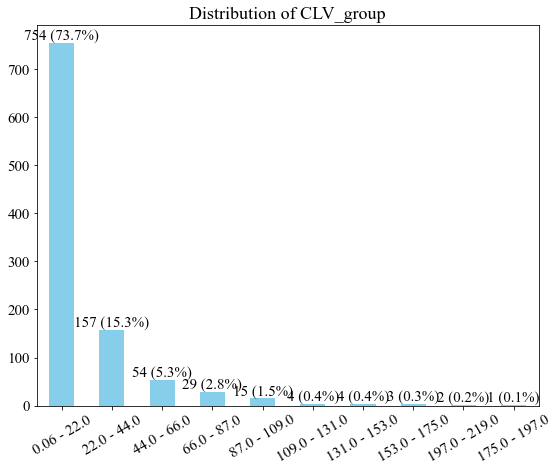

In [16]:
plot_categorical("CLV",df_sales_data, bins=10, rotation=30)

<Figure size 648x504 with 0 Axes>

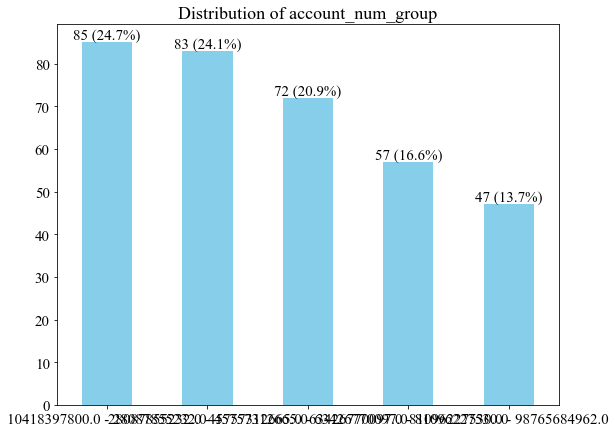

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

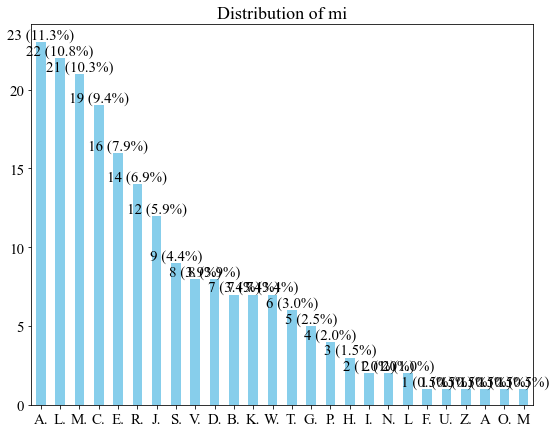

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

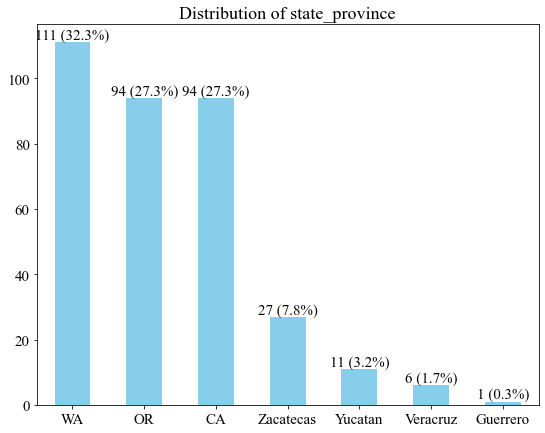

<Figure size 648x504 with 0 Axes>

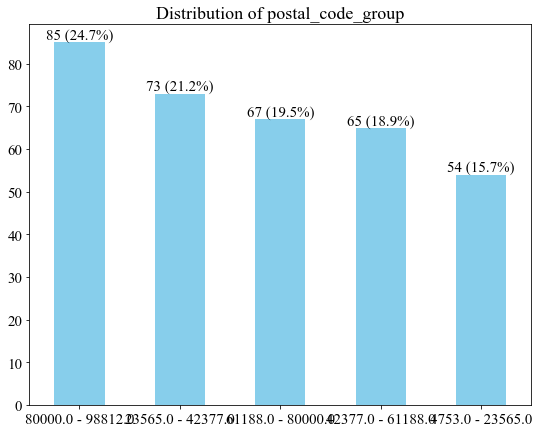

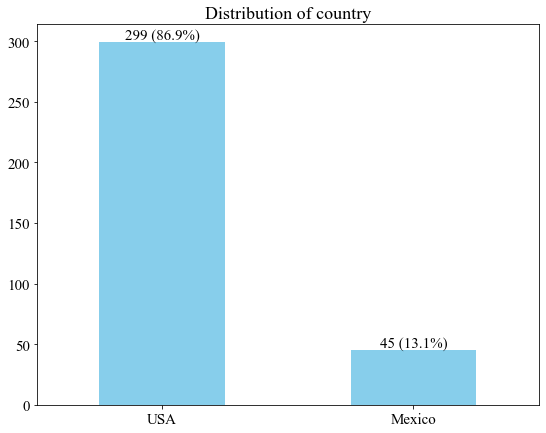

<Figure size 648x504 with 0 Axes>

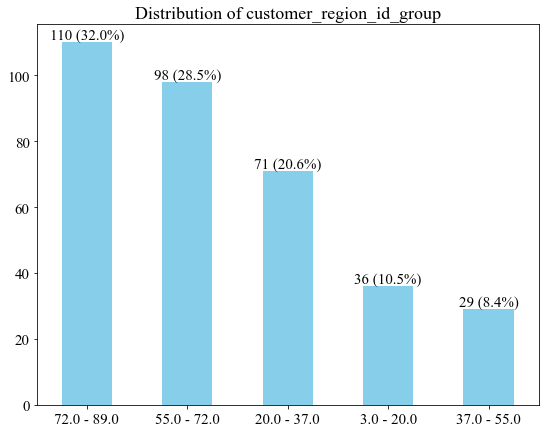

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

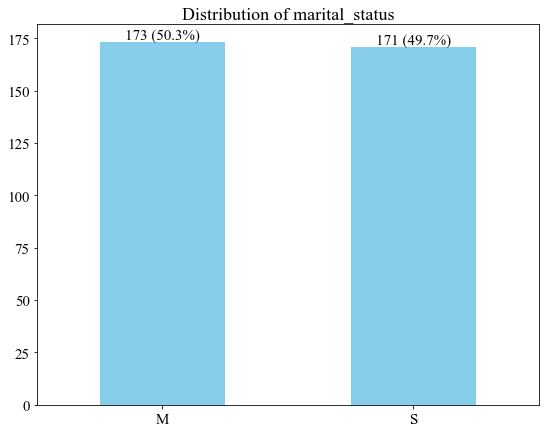

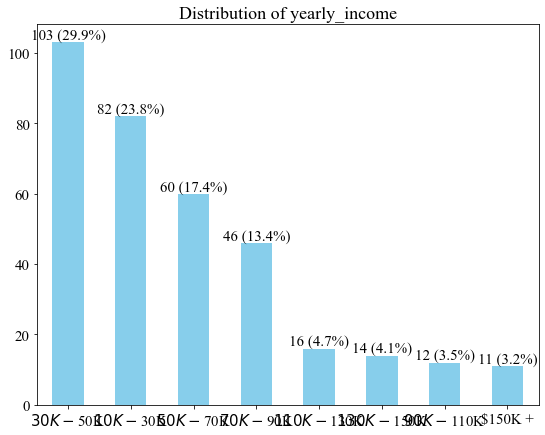

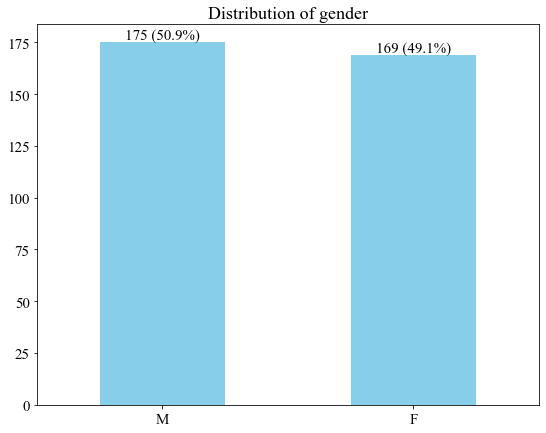

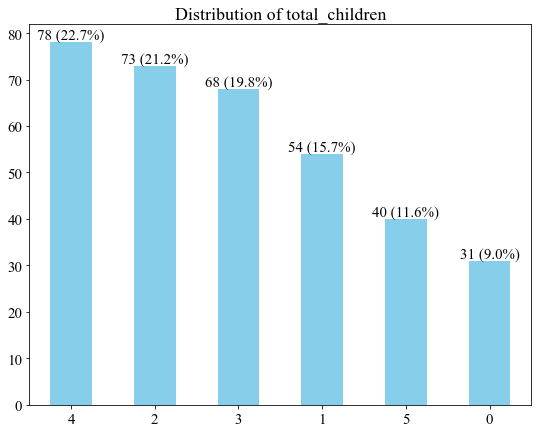

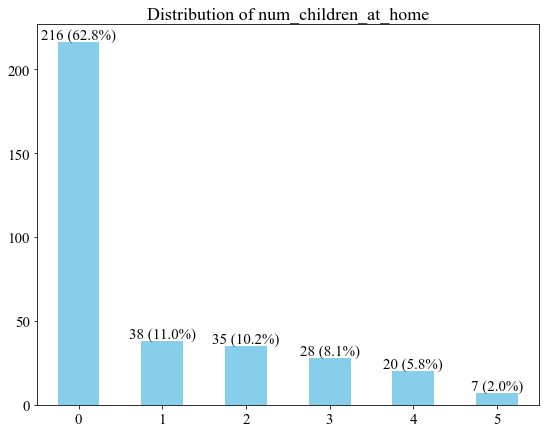

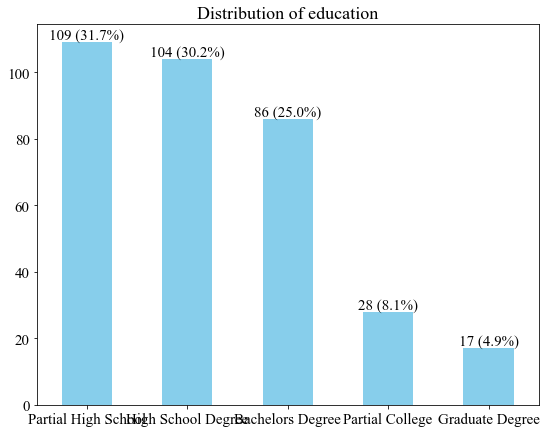

<Figure size 648x504 with 0 Axes>

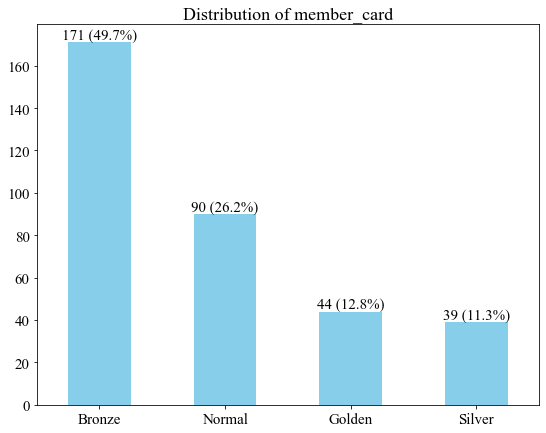

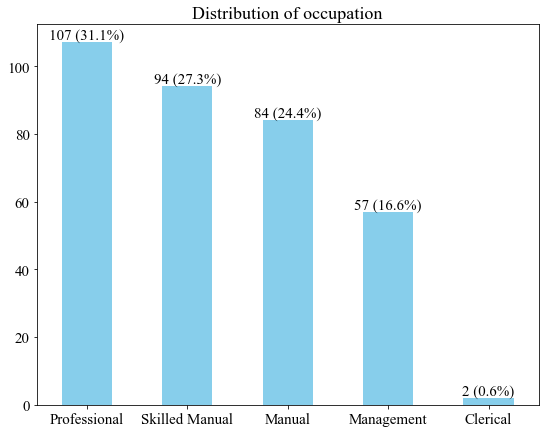

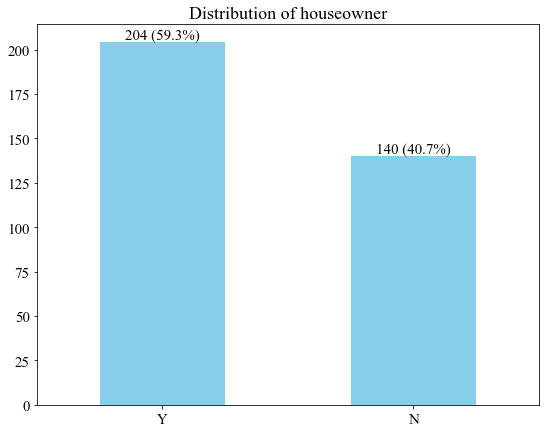

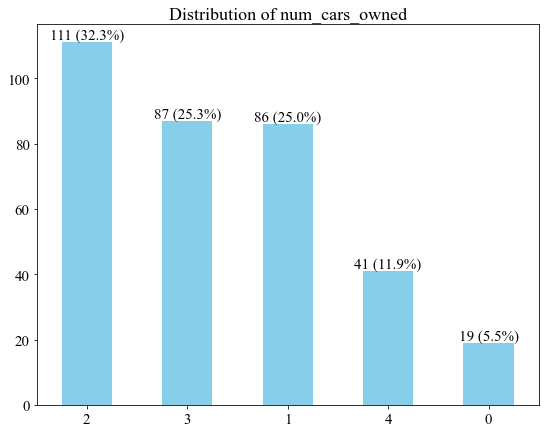

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

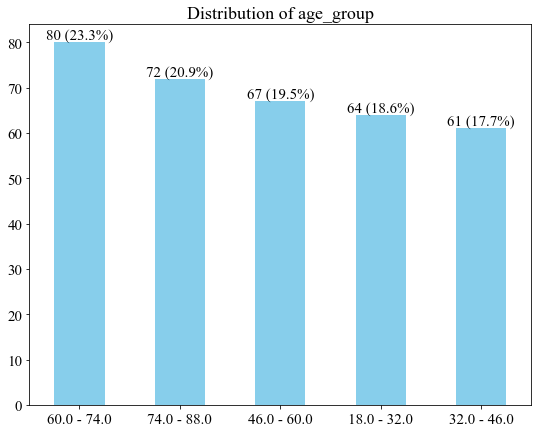

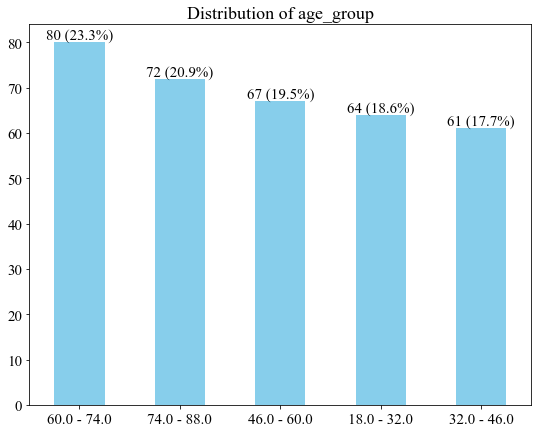

<Figure size 648x504 with 0 Axes>

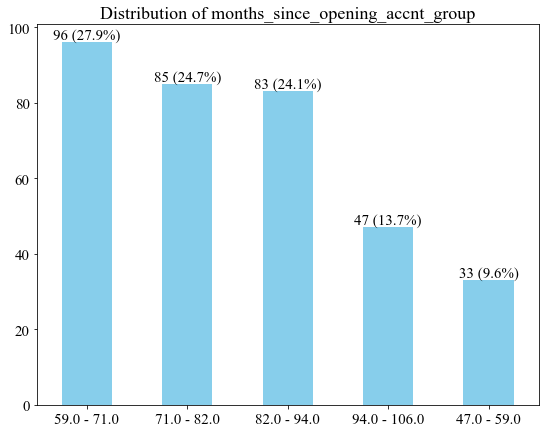

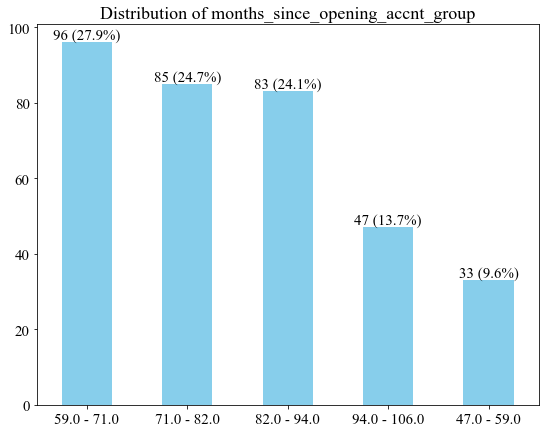

In [17]:
for feature in df_top_customers_information_CLV.columns:
    plot_categorical(feature, df_top_customers_information_CLV)

## RFM Model (Recency, Frequency and Monetary)

### Recency

In [18]:
last_purchase_date = df_sales_data_ungrouped.groupby(df_sales_data_ungrouped.index)['the_date'].max()
df_sales_data['Recency'] =  ((datetime(1998, 12, 31) - last_purchase_date).astype('m8[D]'))
df_sales_data

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,CLV,CLV_percentage,cumulative_CLV_percentage,CLV_group,Recency
customer_id,,,,,,,,,,,,
1297,182872,184931,4016,1826.31,730.667,891,3190,218.544999,1.174190,1.174190,197.0 - 219.0,33.0
4868,185706,162325,3552,1389.46,551.305,659,2762,205.264974,1.102840,2.277029,197.0 - 219.0,4.0
8511,183401,181301,3792,1509.47,597.658,698,3209,194.833901,1.046796,3.323825,175.0 - 197.0,21.0
2201,148021,136555,3040,1184.92,471.408,558,2299,169.309441,0.909659,4.233484,153.0 - 175.0,4.0
9631,163672,147811,3152,1371.25,557.852,678,2581,158.269715,0.850345,5.083830,153.0 - 175.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9196,2612,2799,42,10.55,4.665,4,72,0.081094,0.000436,99.998586,0.06 - 22.0,163.0
5916,2953,4176,8,7.44,3.329,5,92,0.067978,0.000365,99.998952,0.06 - 22.0,52.0
9994,357,1798,28,2.53,0.899,2,36,0.067109,0.000361,99.999312,0.06 - 22.0,197.0


In [19]:
df_sales_data_ungrouped.loc[1297]['the_date'].max()

Timestamp('1998-11-28 00:00:00')

In [20]:
df_sales_data['Recency'] = 1/df_sales_data['Recency']
df_sales_data

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,CLV,CLV_percentage,cumulative_CLV_percentage,CLV_group,Recency
customer_id,,,,,,,,,,,,
1297,182872,184931,4016,1826.31,730.667,891,3190,218.544999,1.174190,1.174190,197.0 - 219.0,0.030303
4868,185706,162325,3552,1389.46,551.305,659,2762,205.264974,1.102840,2.277029,197.0 - 219.0,0.250000
8511,183401,181301,3792,1509.47,597.658,698,3209,194.833901,1.046796,3.323825,175.0 - 197.0,0.047619
2201,148021,136555,3040,1184.92,471.408,558,2299,169.309441,0.909659,4.233484,153.0 - 175.0,0.250000
9631,163672,147811,3152,1371.25,557.852,678,2581,158.269715,0.850345,5.083830,153.0 - 175.0,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...
9196,2612,2799,42,10.55,4.665,4,72,0.081094,0.000436,99.998586,0.06 - 22.0,0.006135
5916,2953,4176,8,7.44,3.329,5,92,0.067978,0.000365,99.998952,0.06 - 22.0,0.019231
9994,357,1798,28,2.53,0.899,2,36,0.067109,0.000361,99.999312,0.06 - 22.0,0.005076


### Frequency

In [21]:
df_sales_data_ungrouped['customer_id'] = df_sales_data_ungrouped.index
df_sales_data['Frequency'] = df_sales_data_ungrouped['customer_id'].value_counts().sort_index()
df_sales_data

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,CLV,CLV_percentage,cumulative_CLV_percentage,CLV_group,Recency,Frequency
customer_id,,,,,,,,,,,,,
1297,182872,184931,4016,1826.31,730.667,891,3190,218.544999,1.174190,1.174190,197.0 - 219.0,0.030303,251
4868,185706,162325,3552,1389.46,551.305,659,2762,205.264974,1.102840,2.277029,197.0 - 219.0,0.250000,222
8511,183401,181301,3792,1509.47,597.658,698,3209,194.833901,1.046796,3.323825,175.0 - 197.0,0.047619,237
2201,148021,136555,3040,1184.92,471.408,558,2299,169.309441,0.909659,4.233484,153.0 - 175.0,0.250000,190
9631,163672,147811,3152,1371.25,557.852,678,2581,158.269715,0.850345,5.083830,153.0 - 175.0,0.040000,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,2612,2799,42,10.55,4.665,4,72,0.081094,0.000436,99.998586,0.06 - 22.0,0.006135,3
5916,2953,4176,8,7.44,3.329,5,92,0.067978,0.000365,99.998952,0.06 - 22.0,0.019231,4
9994,357,1798,28,2.53,0.899,2,36,0.067109,0.000361,99.999312,0.06 - 22.0,0.005076,2


### Monetary

In [22]:
df_sales_data['Monetary'] = df_sales_data_ungrouped.groupby(df_sales_data_ungrouped.index)['store_sales'].sum()
df_sales_data

,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,CLV,CLV_percentage,cumulative_CLV_percentage,CLV_group,Recency,Frequency,Monetary
customer_id,,,,,,,,,,,,,,
1297,182872,184931,4016,1826.31,730.667,891,3190,218.544999,1.174190,1.174190,197.0 - 219.0,0.030303,251,1826.31
4868,185706,162325,3552,1389.46,551.305,659,2762,205.264974,1.102840,2.277029,197.0 - 219.0,0.250000,222,1389.46
8511,183401,181301,3792,1509.47,597.658,698,3209,194.833901,1.046796,3.323825,175.0 - 197.0,0.047619,237,1509.47
2201,148021,136555,3040,1184.92,471.408,558,2299,169.309441,0.909659,4.233484,153.0 - 175.0,0.250000,190,1184.92
9631,163672,147811,3152,1371.25,557.852,678,2581,158.269715,0.850345,5.083830,153.0 - 175.0,0.040000,197,1371.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,2612,2799,42,10.55,4.665,4,72,0.081094,0.000436,99.998586,0.06 - 22.0,0.006135,3,10.55
5916,2953,4176,8,7.44,3.329,5,92,0.067978,0.000365,99.998952,0.06 - 22.0,0.019231,4,7.44
9994,357,1798,28,2.53,0.899,2,36,0.067109,0.000361,99.999312,0.06 - 22.0,0.005076,2,2.53


### Specify clusters and discover their distribution

In [23]:
from sklearn.preprocessing import MinMaxScaler


df_sales_data['Recency_status'] = df_sales_data.apply(lambda x: 'H' if x.Recency > df_sales_data['Recency'].mean() else 'L', axis=1)
df_sales_data['Frequency_status'] = df_sales_data.apply(lambda x: 'H' if x.Frequency > df_sales_data['Frequency'].mean() else 'L', axis=1)
df_sales_data['Monetary_status'] = df_sales_data.apply(lambda x: 'H' if x.Monetary > df_sales_data['Monetary'].mean() else 'L', axis=1)


In [24]:
df_sales_data[['Recency', "Frequency", "Monetary"]].mean()

Recency        0.053188
Frequency     32.209189
Monetary     211.775425
dtype: float64

In [25]:
df_sales_data['cluster'] = df_sales_data['Recency_status'] + df_sales_data['Frequency_status'] + df_sales_data['Monetary_status']
df_sales_data.sample(10)


,product_id,time_id,store_id,store_sales,store_cost,unit_sales,period_id,CLV,CLV_percentage,cumulative_CLV_percentage,CLV_group,Recency,Frequency,Monetary,Recency_status,Frequency_status,Monetary_status,cluster
customer_id,,,,,,,,,,,,,,,,,,
3531,8869,10016,68,75.21,29.326,34,201,3.397566,0.018254,97.794070,0.06 - 22.0,0.026316,11,75.21,L,L,L,LLL
6660,8083,7821,171,48.23,18.684,25,153,1.530095,0.008221,99.270066,0.06 - 22.0,0.009524,9,48.23,L,L,L,LLL
8973,91086,98370,428,702.76,288.098,328,1999,19.249889,0.103425,75.691913,0.06 - 22.0,0.090909,107,702.76,H,H,H,HHH
2090,10320,12090,180,74.58,31.368,38,258,0.933896,0.005018,99.716311,0.06 - 22.0,0.019608,12,74.58,L,L,L,LLL
3325,26970,29112,494,239.12,100.448,113,522,29.487830,0.158431,62.250392,22.0 - 44.0,0.047619,38,239.12,L,H,H,LHH
8180,31942,35740,699,234.32,96.652,109,734,6.151764,0.033052,94.707287,0.06 - 22.0,0.037037,39,234.32,L,H,H,LHH
915,13665,18350,342,103.15,41.288,47,398,1.220024,0.006555,99.534055,0.06 - 22.0,0.018868,18,103.15,L,L,L,LLL
6435,1111,5025,35,26.13,10.850,14,110,0.303198,0.001629,99.963432,0.06 - 22.0,0.010989,5,26.13,L,L,L,LLL
7118,6790,6078,133,48.83,19.890,22,120,1.502086,0.008070,99.302703,0.06 - 22.0,0.008929,7,48.83,L,L,L,LLL


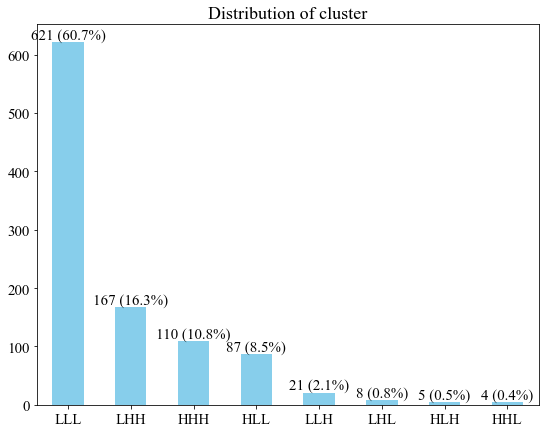

In [26]:
plot_categorical('cluster', df_sales_data,rotation=0)

In [27]:
pd.DataFrame(df_sales_data.cluster.value_counts())

,cluster
LLL,621
LHH,167
HHH,110
HLL,87
LLH,21
LHL,8
HLH,5
HHL,4


### Calculate CLV based on RFM
CLV_RFM = (0.15 * R) + (0.35 * F) + (0.50 * M)

### Scale R, F and M to 0 to 1

In [28]:
import numpy as np
scaler = MinMaxScaler()

df_sales_data['Recency_scaled'] = scaler.fit_transform(df_sales_data['Recency'].values.reshape(-1, 1))
df_sales_data['Frequency_scaled'] = scaler.fit_transform(df_sales_data['Recency'].values.reshape(-1, 1))
df_sales_data['Monetary_scaled'] = scaler.fit_transform(df_sales_data['Recency'].values.reshape(-1, 1))

df_sales_data['CLV_RFM'] = 0.15 * df_sales_data['Recency'] \
    + 0.35 * df_sales_data['Frequency'] \
    + 0.5 * df_sales_data['Monetary']
# df_sales_data.groupby(by='cluster')['CLV_RFM'].sum()

### Correlation between CLV_RFM and CLV

In [29]:
df_sales_data = df_sales_data.sort_index()
df_sales_data['CLV'].corr(df_sales_data['CLV_RFM'])

0.6916039906039843

621
167
110
87
21
8
5
4


Text(0.5, 1.0, 'Scatter plot of CLV_RFM vs CLV')

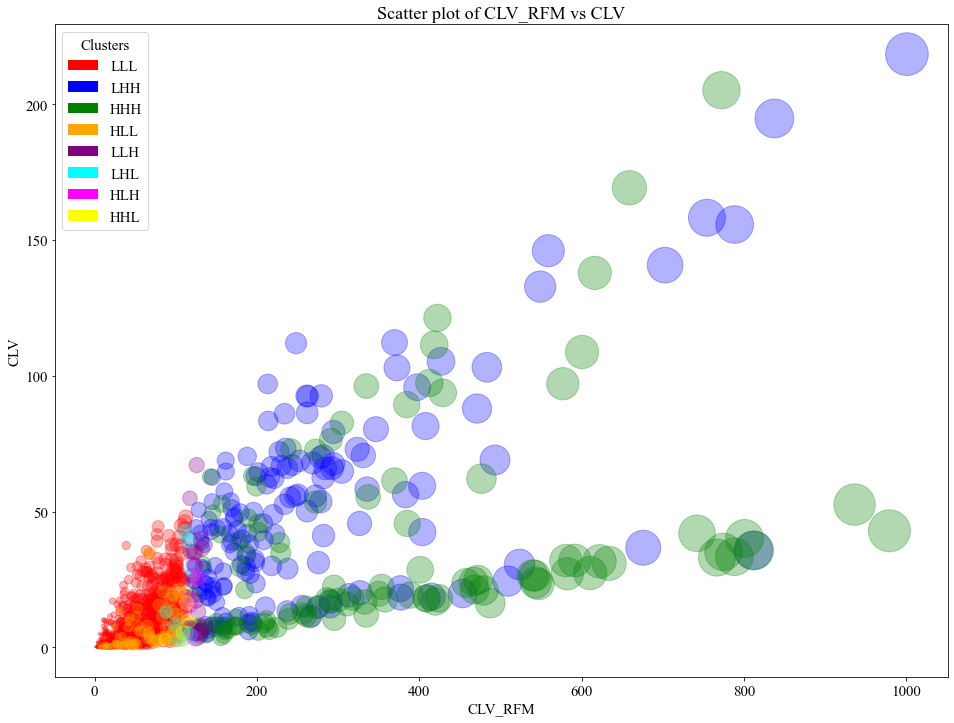

In [30]:
from matplotlib.patches import Patch
colors = {
    'LLL': 'red',
    'LHH': 'blue',
    'HHH': 'green',
    'HLL': 'orange',
    'LLH': 'purple',
    'LHL': 'cyan',
    'HLH': 'magenta',
    'HHL': 'yellow'
}

legend_elements = [Patch(facecolor=color, label=cluster) for cluster, color in colors.items()]

plt.figure(figsize=(16, 12))
for cluster_name, color in colors.items():
    cluster_data = df_sales_data[df_sales_data['cluster'] == cluster_name]
    print(len(cluster_data))
    plt.scatter(cluster_data['CLV_RFM'], cluster_data['CLV'], alpha=0.3, c=color, s=cluster_data['Monetary'])
    
plt.xlabel('CLV_RFM')
plt.legend(handles=legend_elements, loc='best', title='Clusters')
plt.ylabel('CLV')
plt.title("Scatter plot of CLV_RFM vs CLV")

### How Much is total CLV of "HHH" and "LHH" ?

In [31]:
df_top_customers_RFM = df_sales_data[df_sales_data.cluster.isin(['HHH', 'LHH'])]
print("Sum of CLV for HHH and LHH", df_top_customers_RFM.CLV.sum())
print("Share of CLV for HHH and LHH ",100 * (df_sales_data[df_sales_data.cluster.isin(['HHH', 'LHH'])].CLV.sum()/df_sales_data.CLV.sum()), "%")

Sum of CLV for HHH and LHH 11832.220424700194
Share of CLV for HHH and LHH  63.571685060247226 %


In [32]:
intersections = df_top_customers_CLV.index.intersection(df_top_customers_RFM.index)
len(intersections)

207

### Distribution of cluster for customers with 80% of CLV 

### Combine indexes of top CLV and CLV_RFM customers

In [35]:
df_top_customers_information_RFM = df_customer_information.loc[df_top_customers_RFM.index]
top_customers_total = pd.Index.union(df_top_customers_RFM.index, df_top_customers_CLV.index)


### Define Low_value_customers

In [41]:
low_value_customers = df_sales_data.index.difference(top_customers_total)
high_value_customers_v2 = intersections

In [43]:
low_value_customers_v2 = df_sales_data.index.difference(high_value_customers_v2)

In [44]:
df_low_value_customer_information_v2 = df_customer_information.loc[low_value_customers_v2]
df_high_value_customer_information_v2 = df_customer_information.loc[high_value_customers_v2]

### Comparison between High value customers and Low value customers

<Figure size 648x504 with 0 Axes>

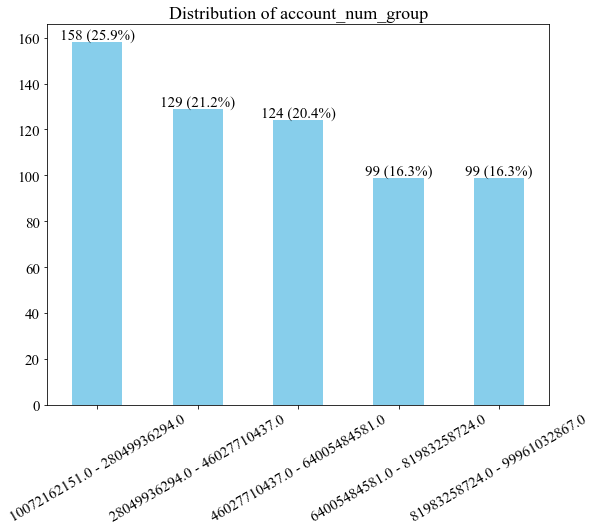

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

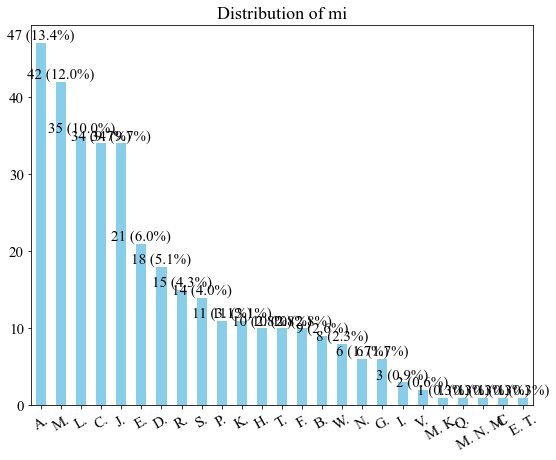

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

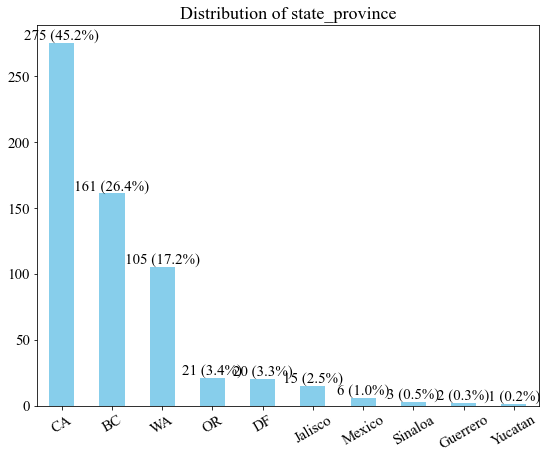

<Figure size 648x504 with 0 Axes>

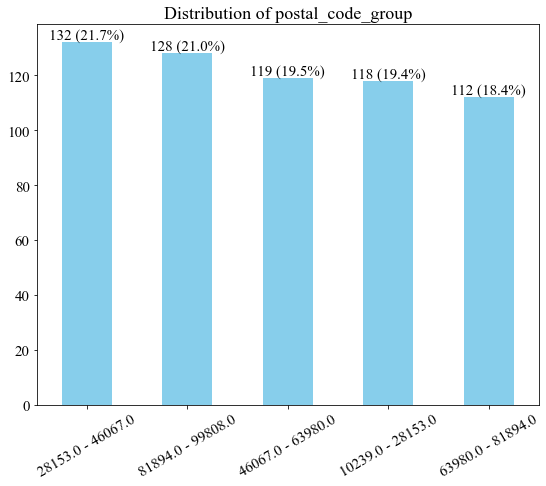

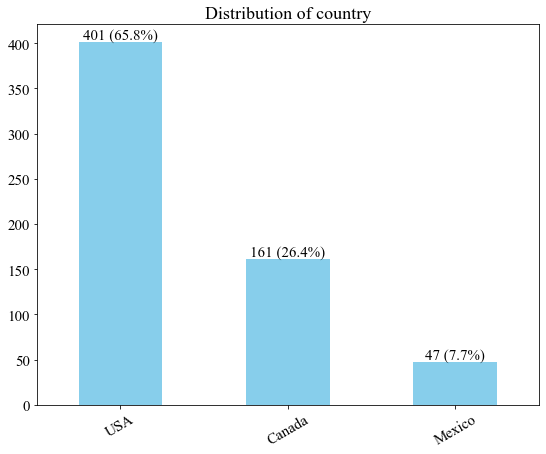

<Figure size 648x504 with 0 Axes>

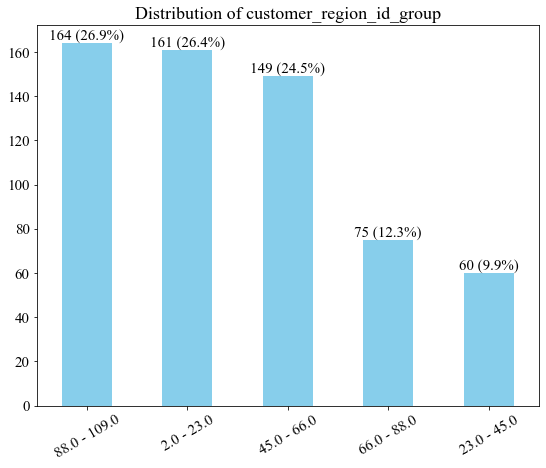

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

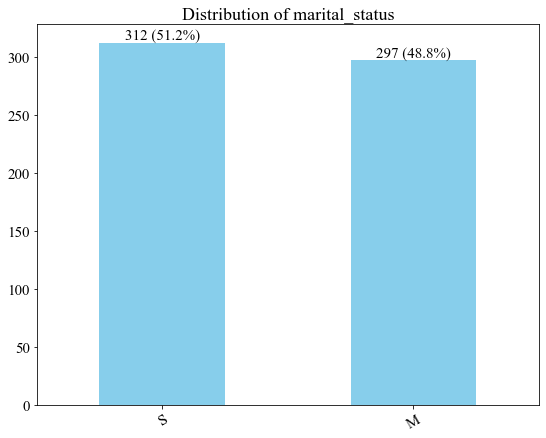

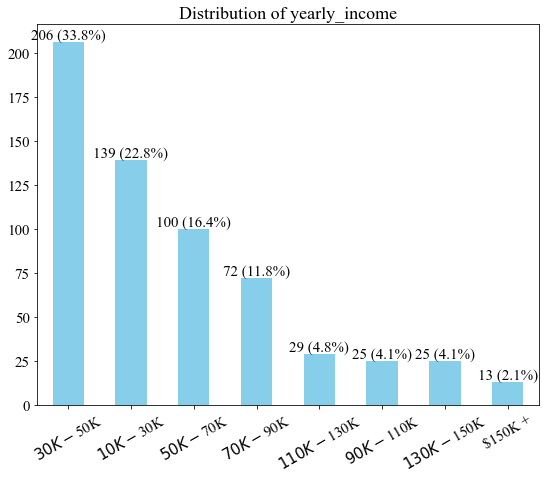

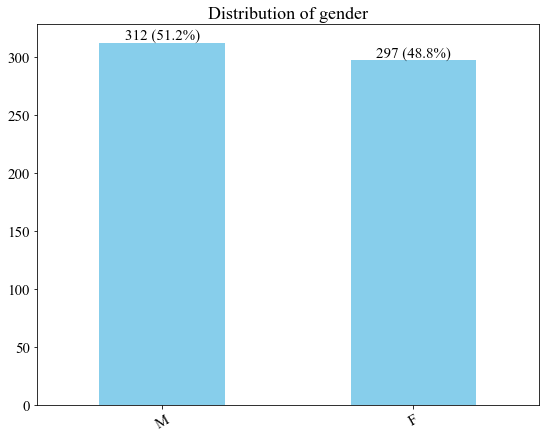

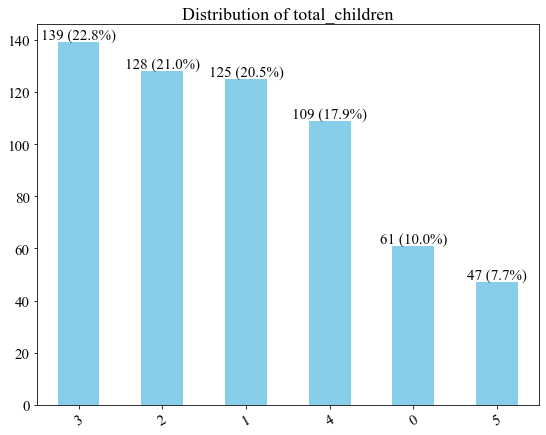

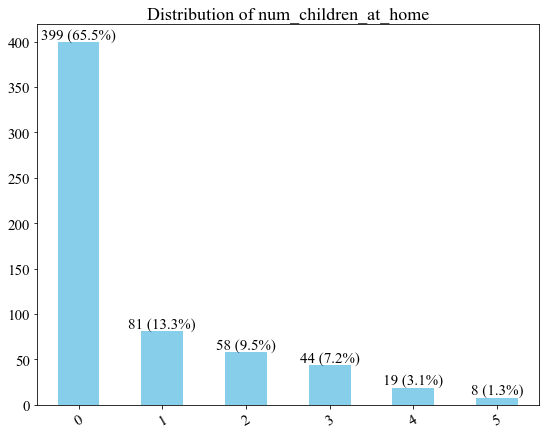

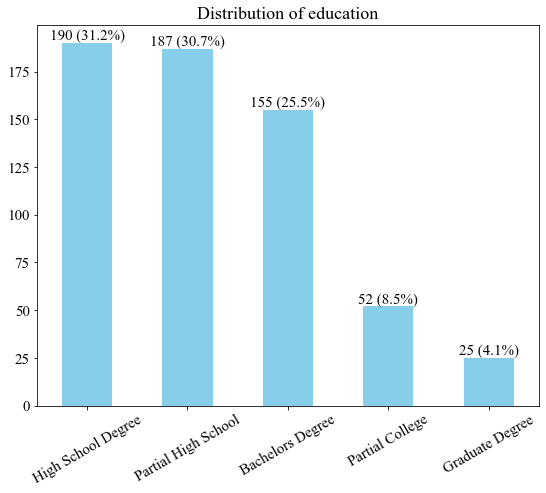

<Figure size 648x504 with 0 Axes>

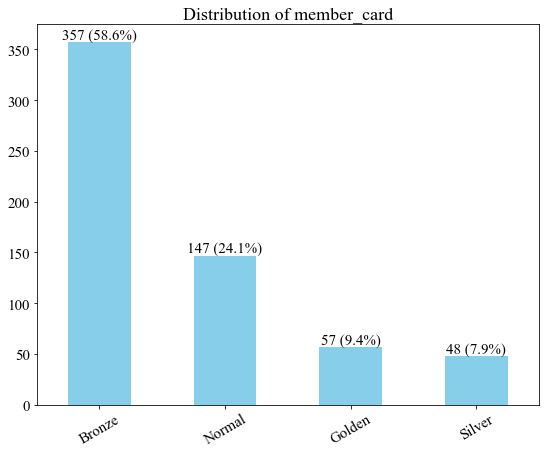

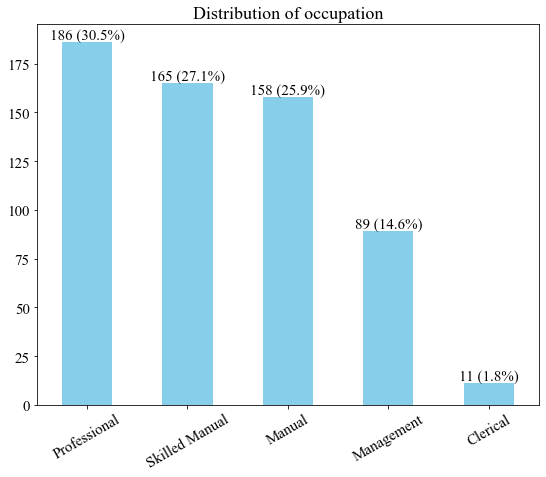

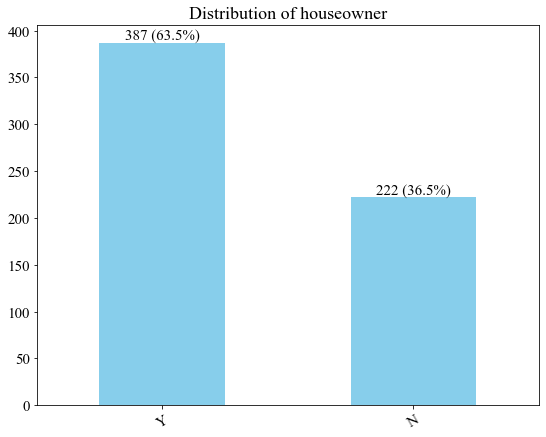

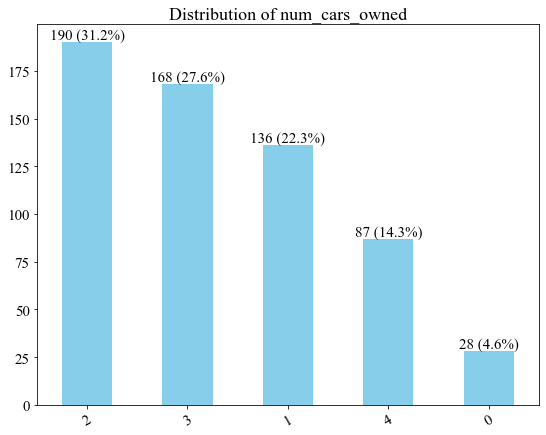

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

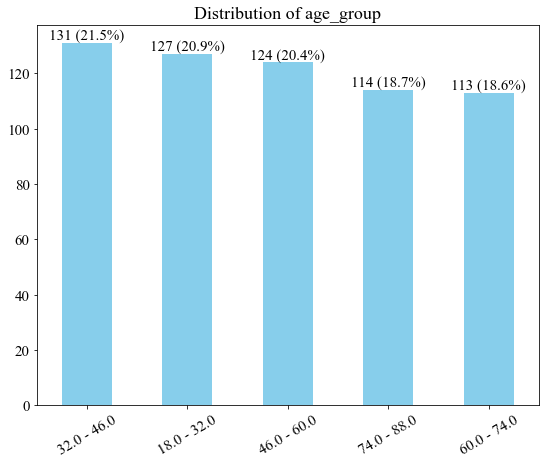

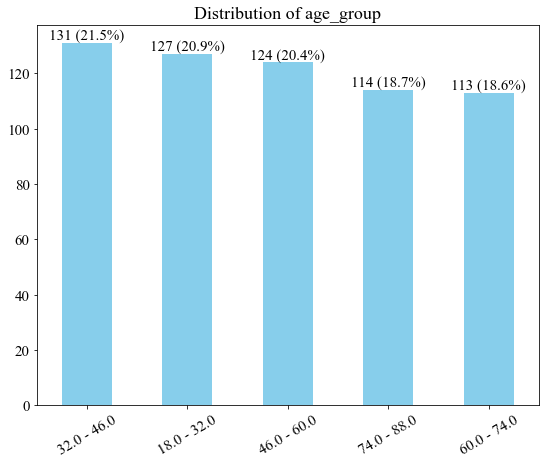

<Figure size 648x504 with 0 Axes>

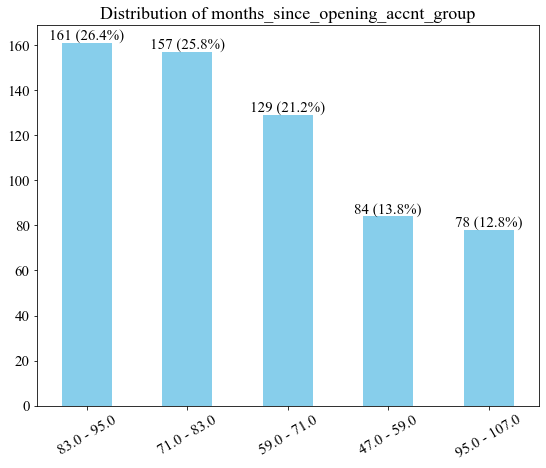

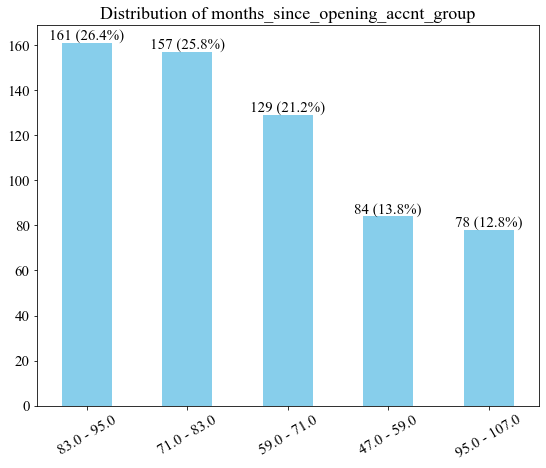

In [37]:
df_low_value_customer_information = df_customer_information.loc[low_value_customers]
df_high_value_customer_information = df_customer_information.loc[top_customers_total]
for feature in df_low_value_customer_information.columns:
    plot_categorical(feature, df_low_value_customer_information, rotation=30)

<Figure size 648x504 with 0 Axes>

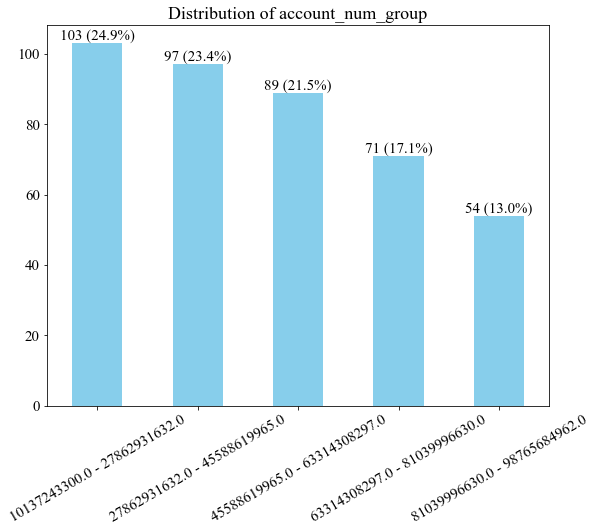

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

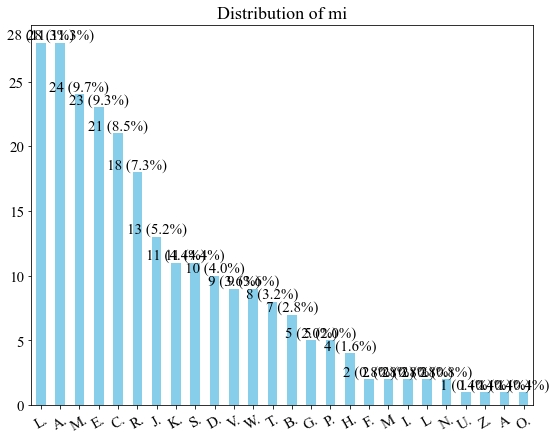

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

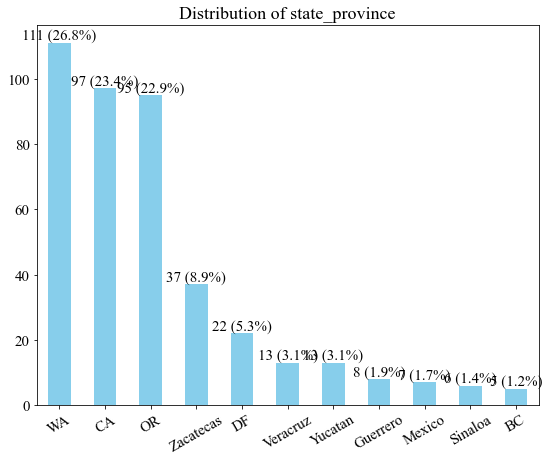

<Figure size 648x504 with 0 Axes>

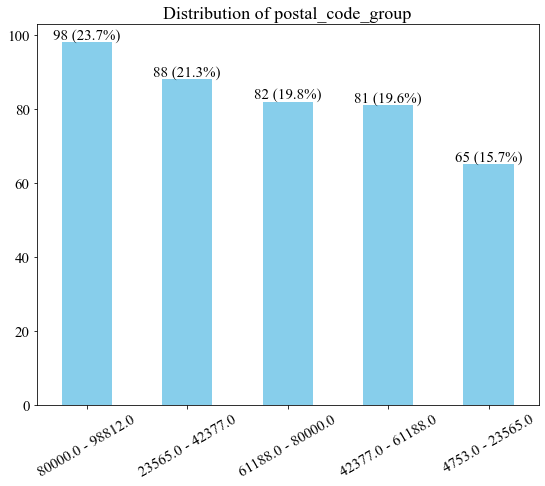

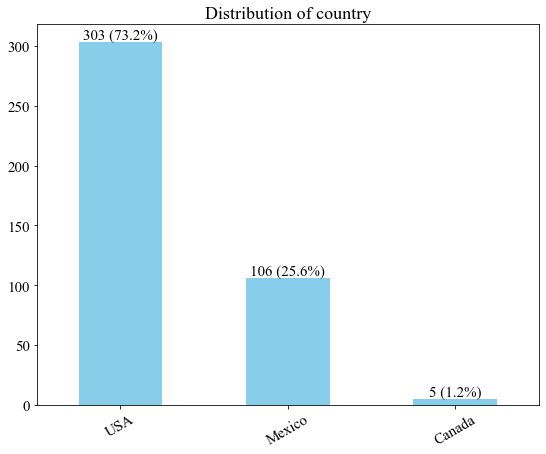

<Figure size 648x504 with 0 Axes>

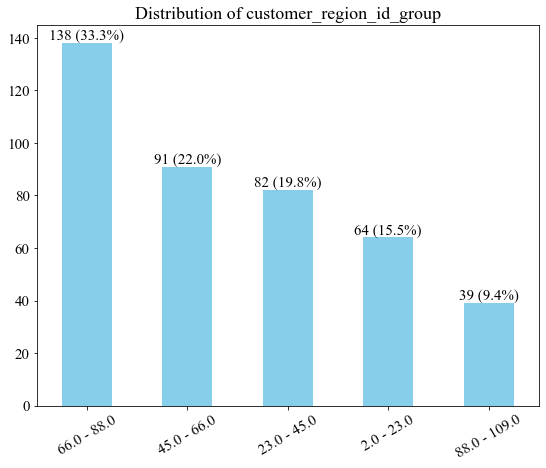

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

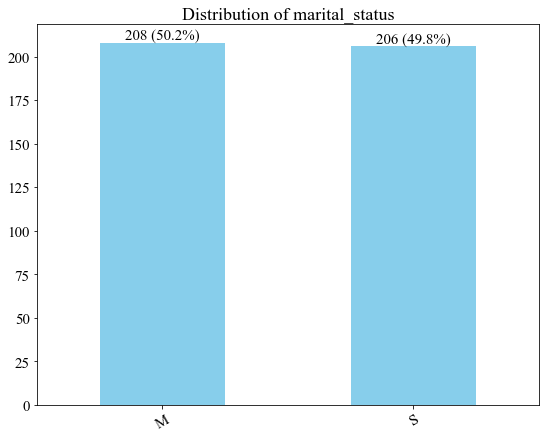

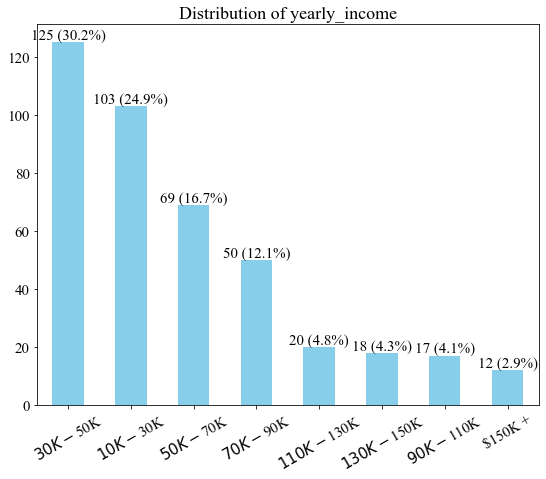

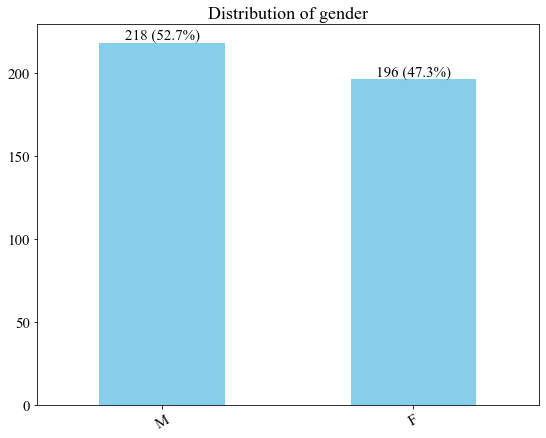

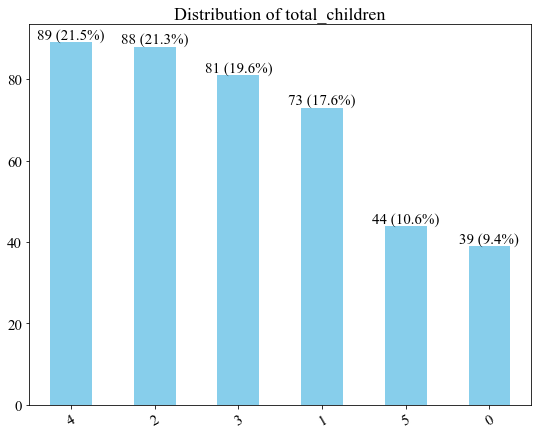

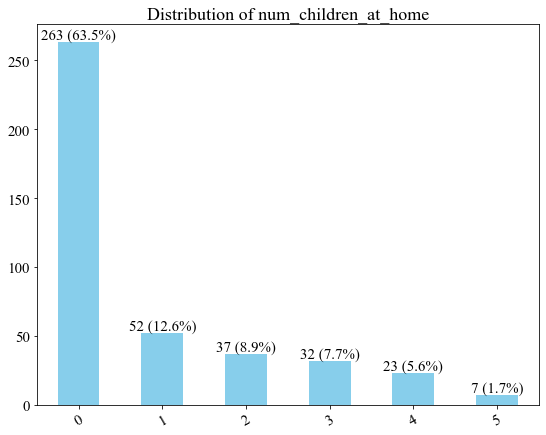

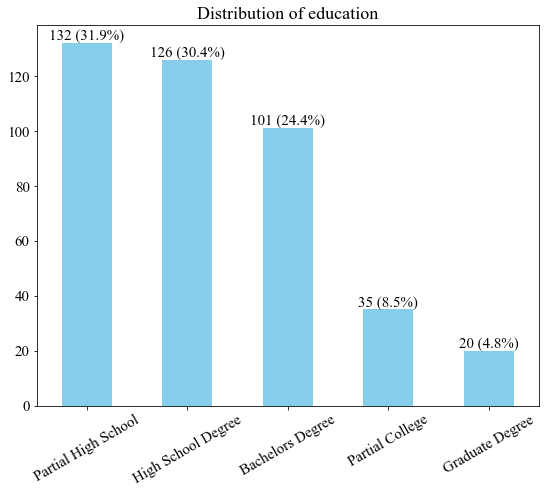

<Figure size 648x504 with 0 Axes>

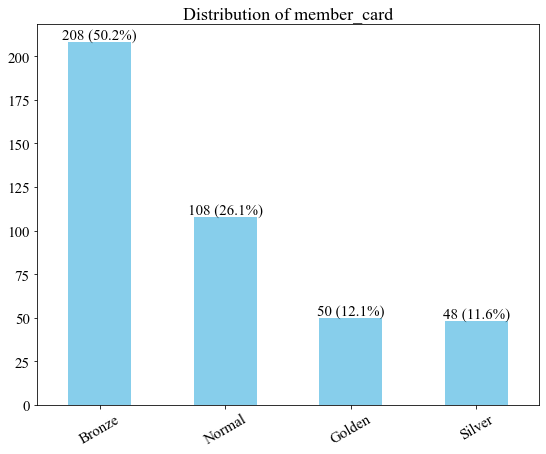

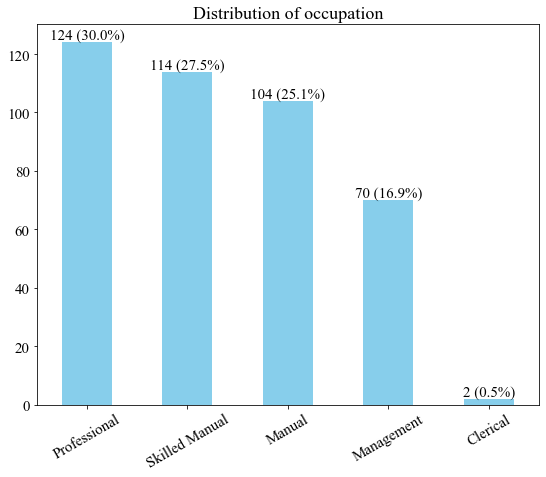

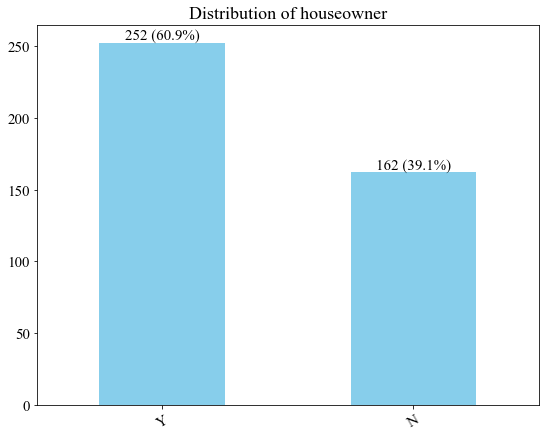

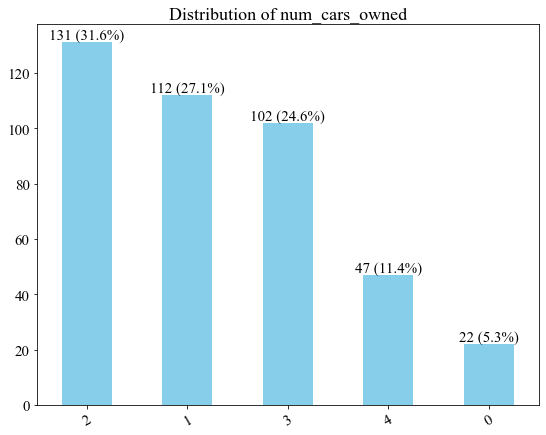

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

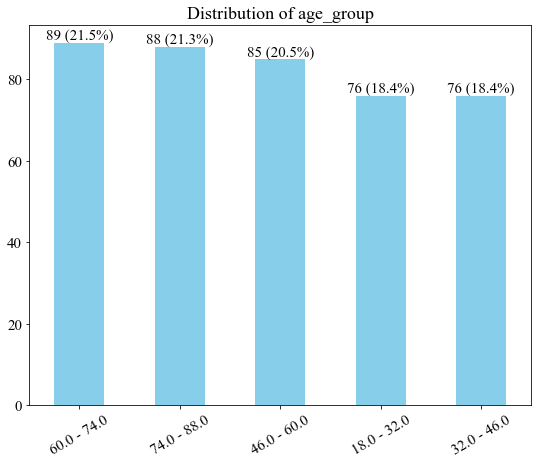

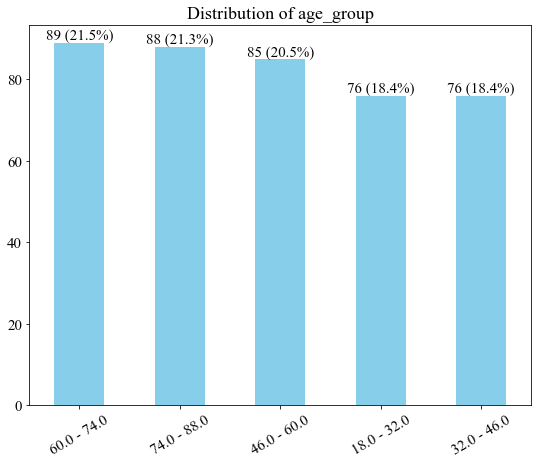

<Figure size 648x504 with 0 Axes>

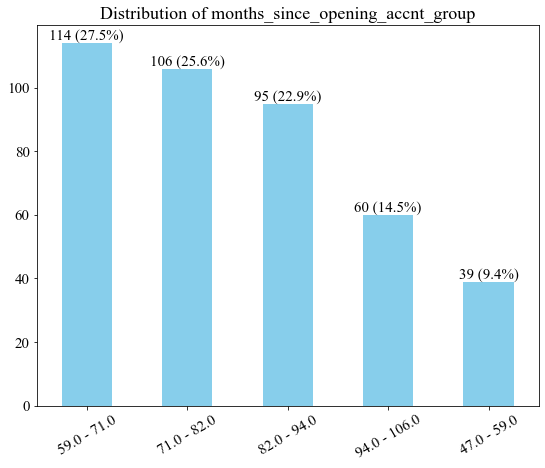

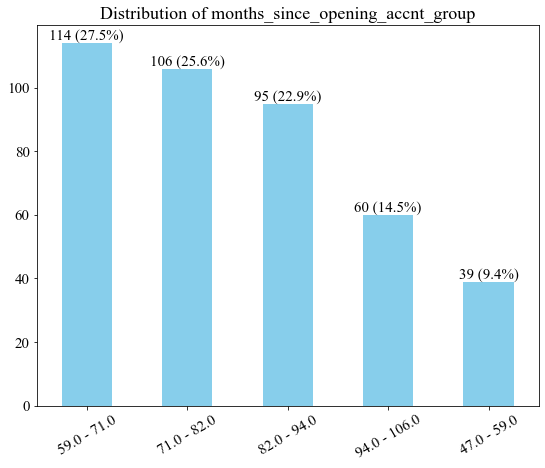

In [38]:
for feature in df_high_value_customer_information.columns:
    plot_categorical(feature, df_high_value_customer_information, rotation=30)

<Figure size 648x504 with 0 Axes>

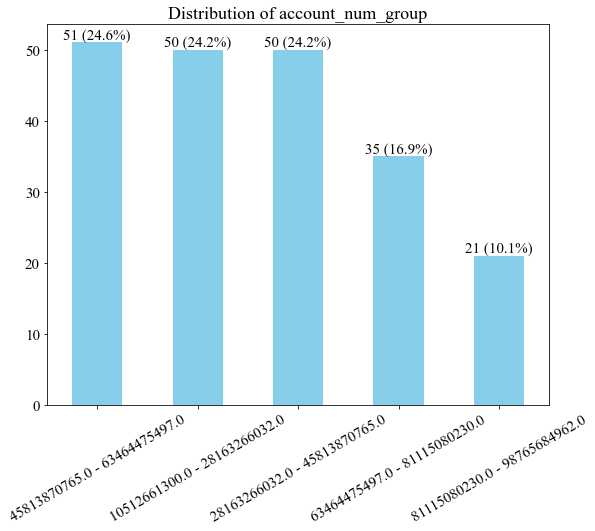

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

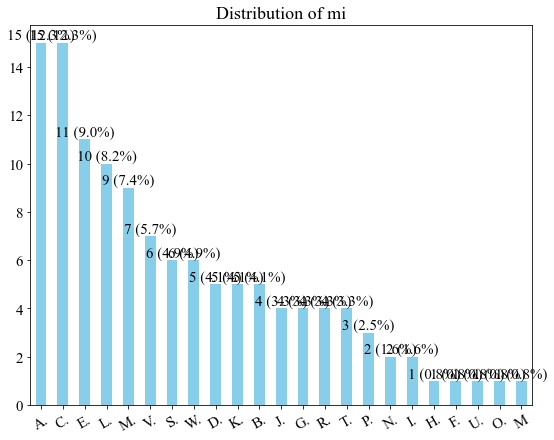

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

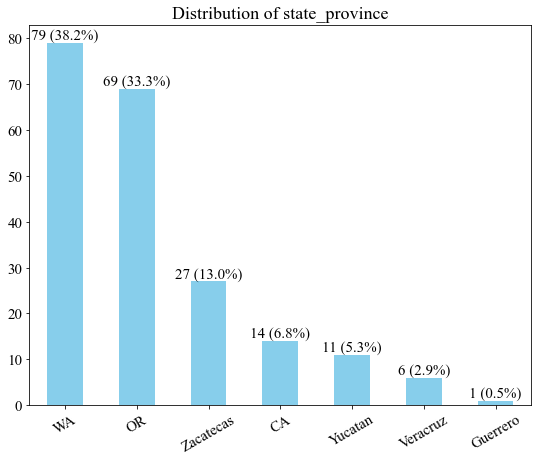

<Figure size 648x504 with 0 Axes>

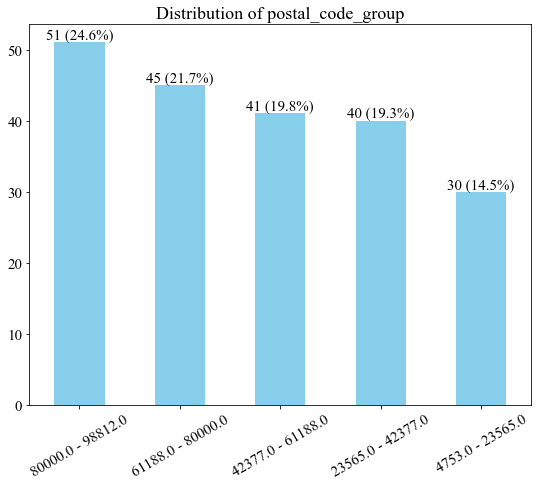

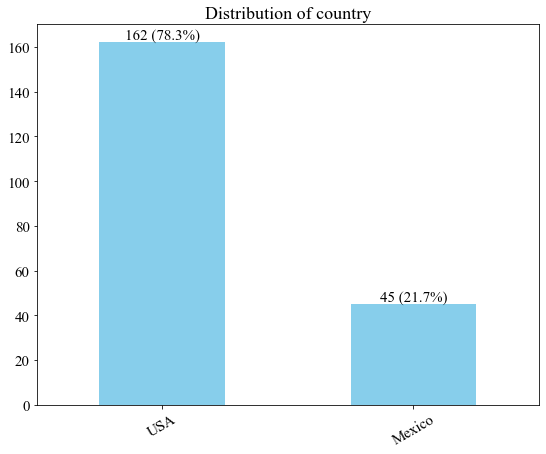

<Figure size 648x504 with 0 Axes>

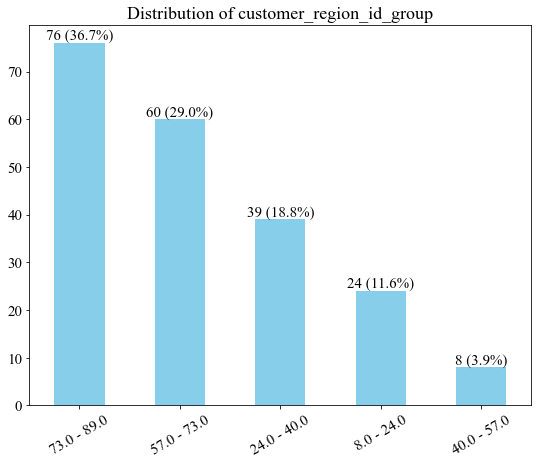

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

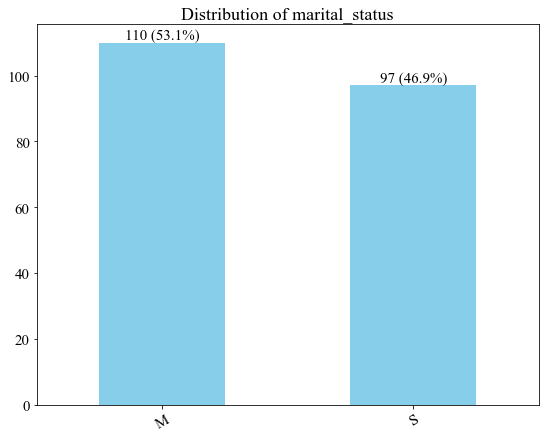

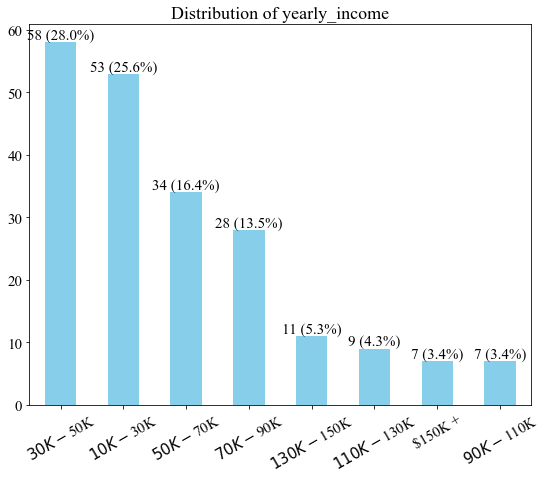

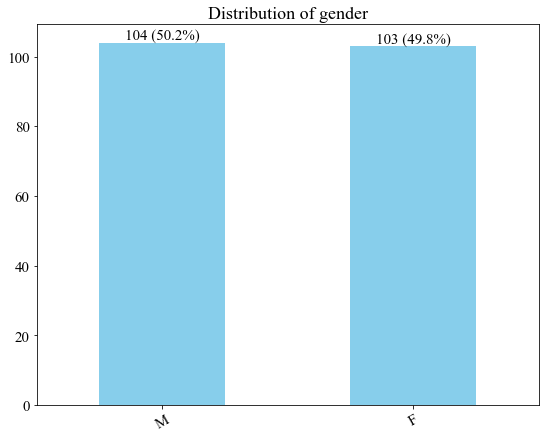

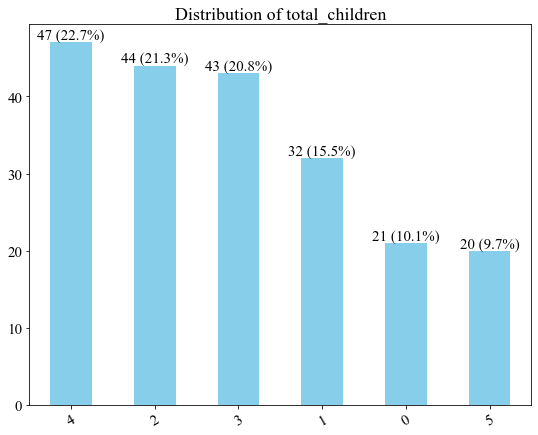

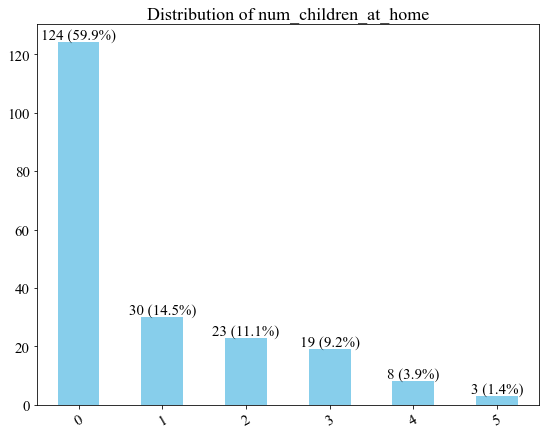

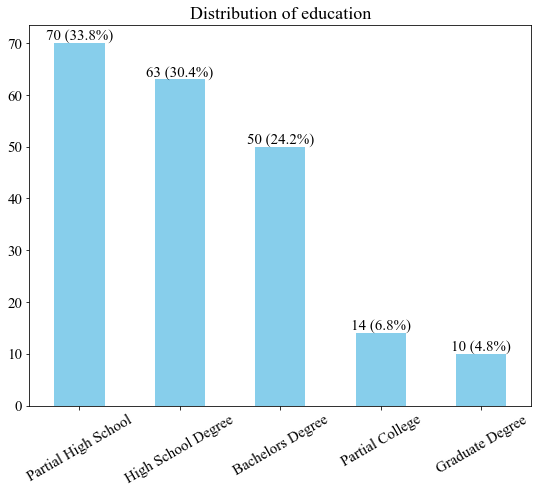

<Figure size 648x504 with 0 Axes>

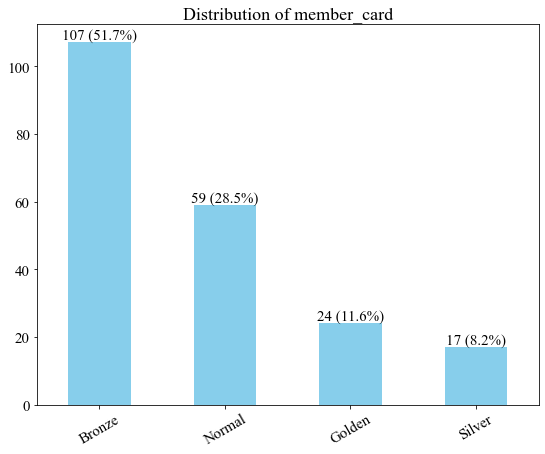

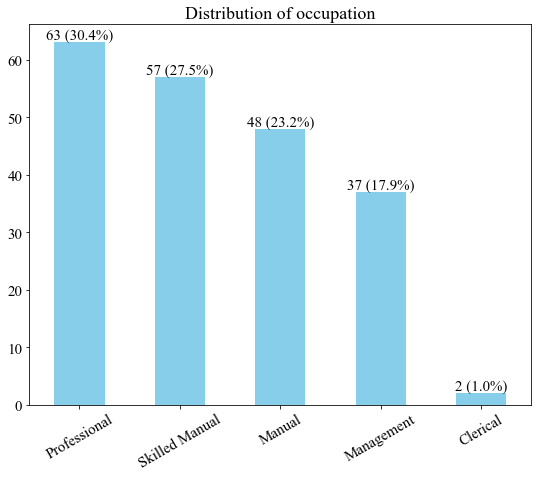

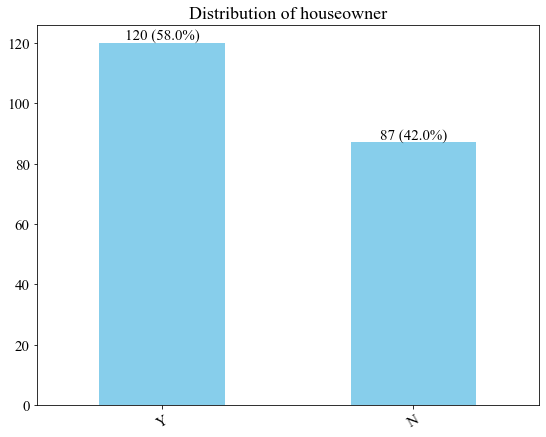

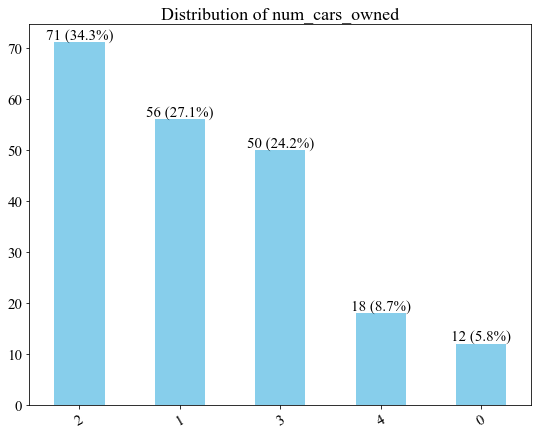

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

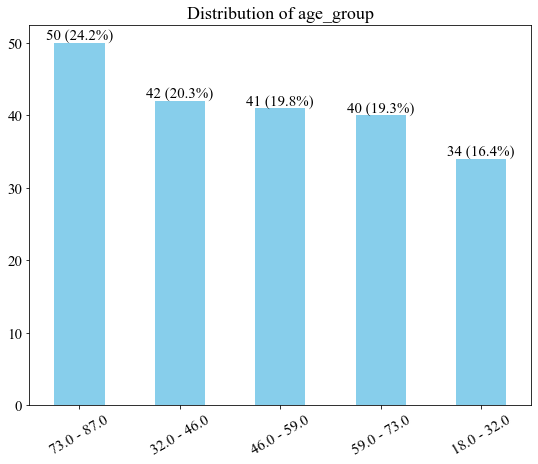

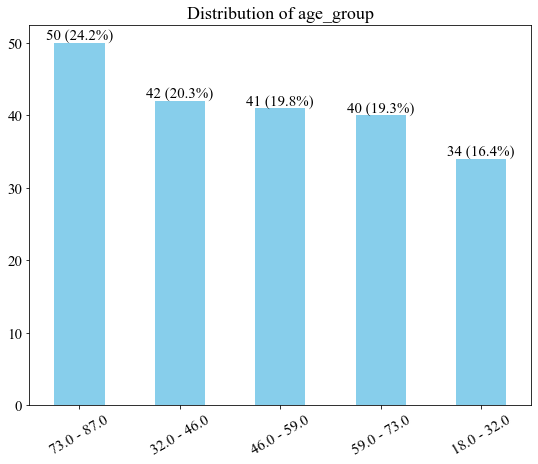

<Figure size 648x504 with 0 Axes>

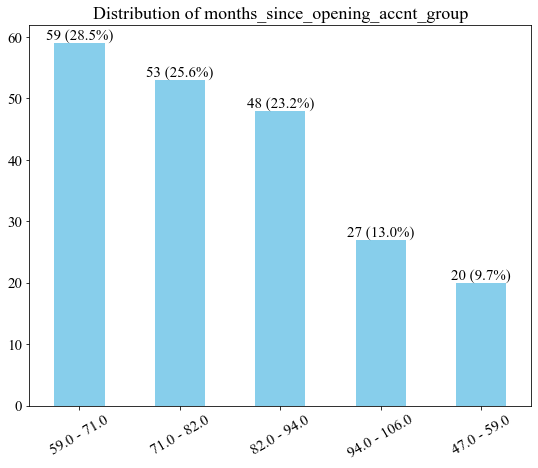

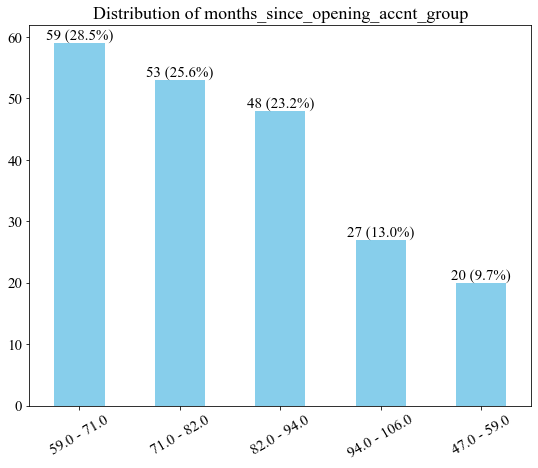

In [45]:
for feature in df_high_value_customer_information_v2.columns:
    plot_categorical(feature, df_high_value_customer_information_v2, rotation=30)

<Figure size 648x504 with 0 Axes>

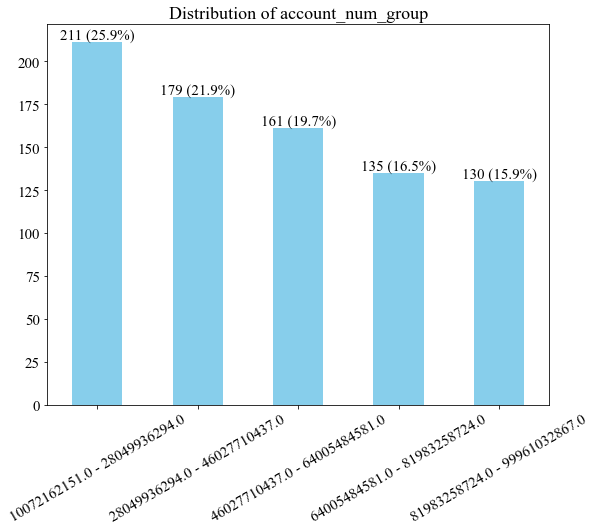

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

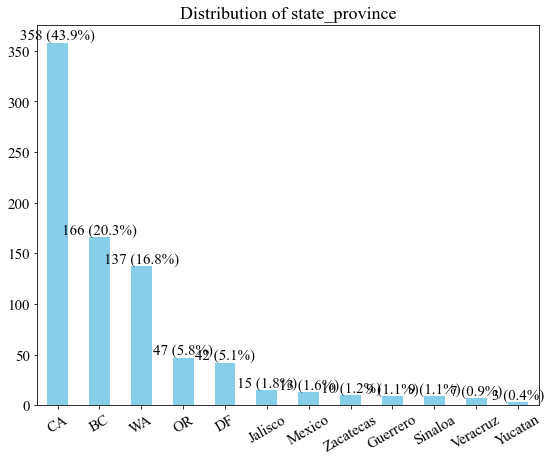

<Figure size 648x504 with 0 Axes>

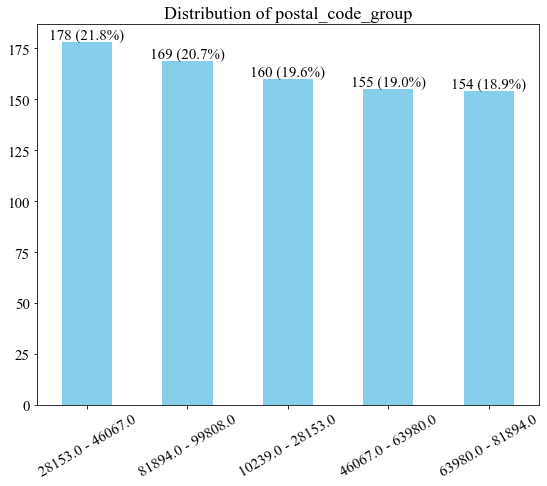

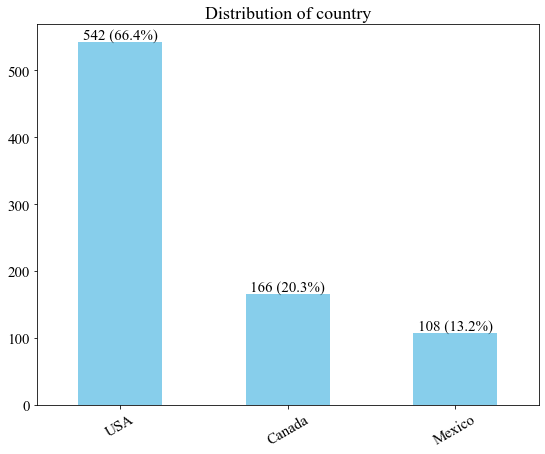

<Figure size 648x504 with 0 Axes>

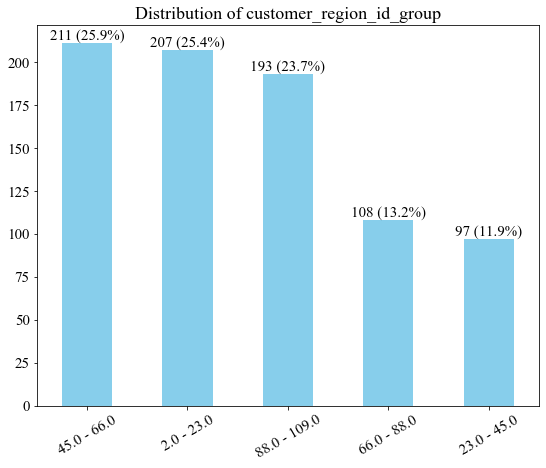

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

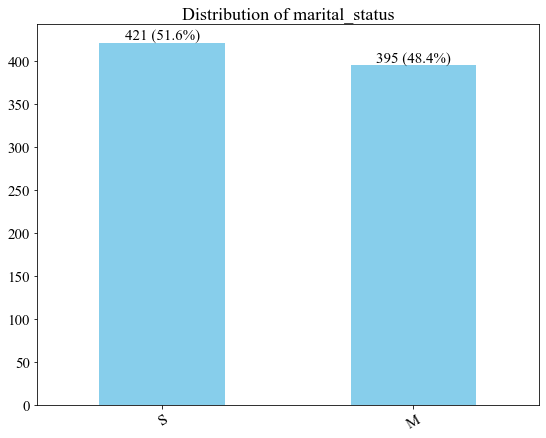

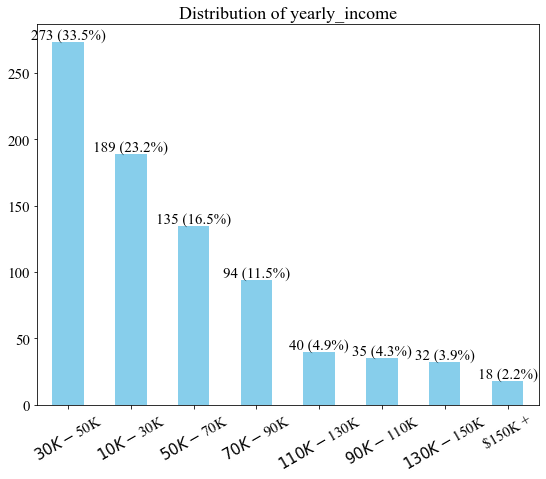

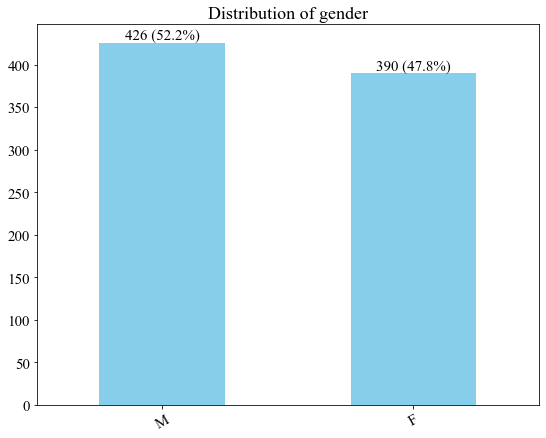

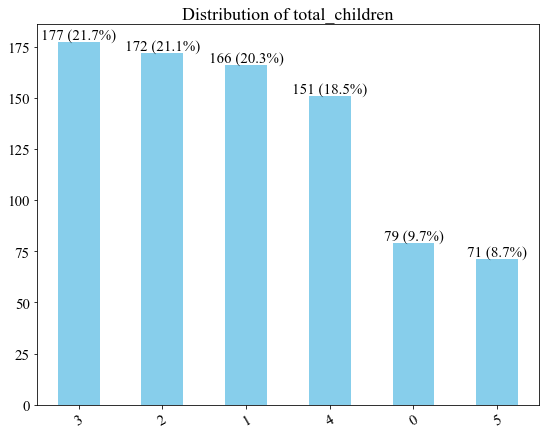

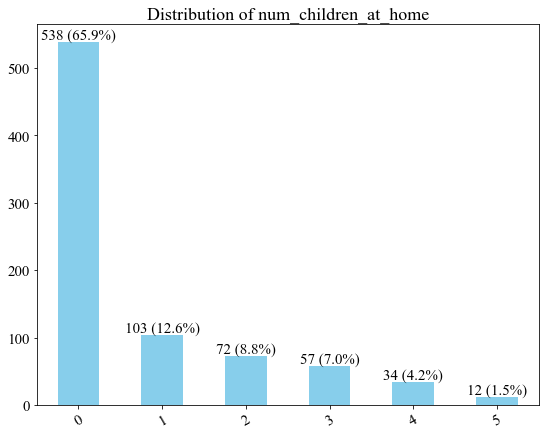

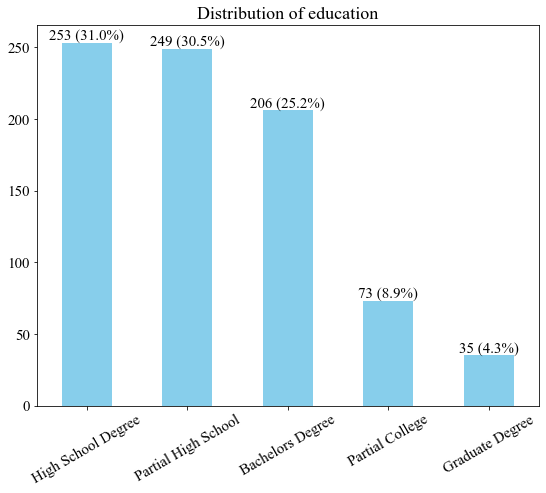

<Figure size 648x504 with 0 Axes>

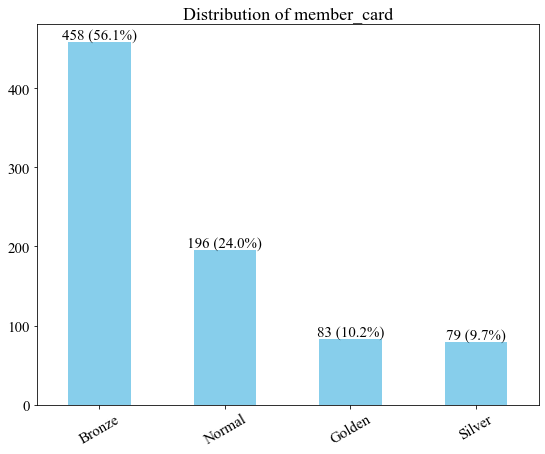

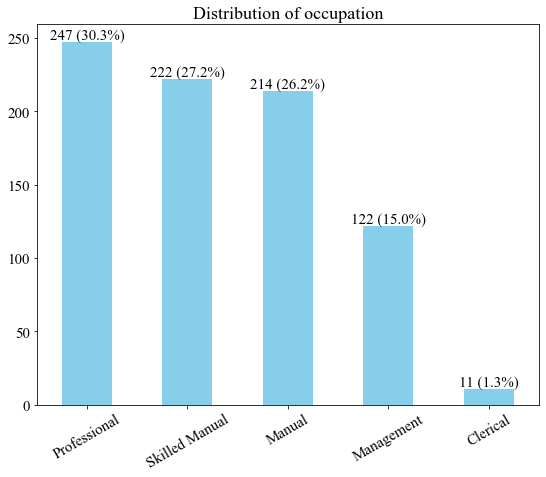

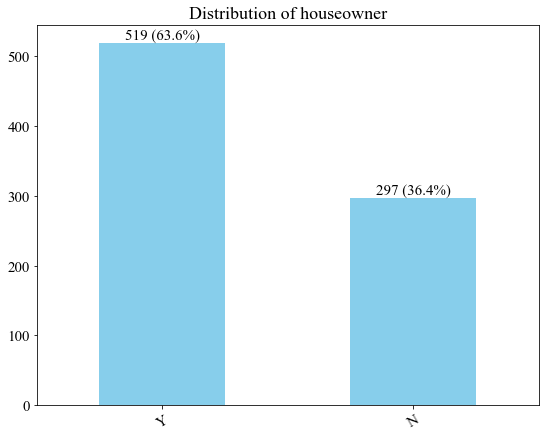

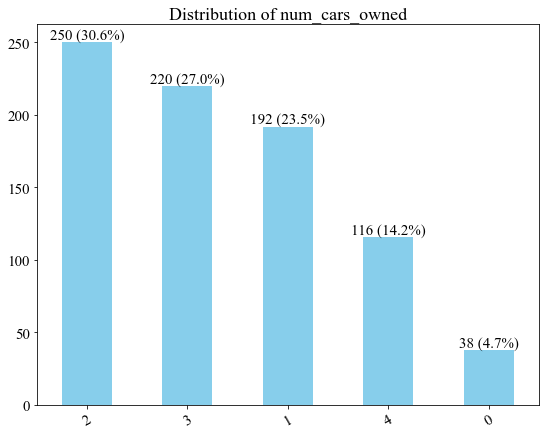

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

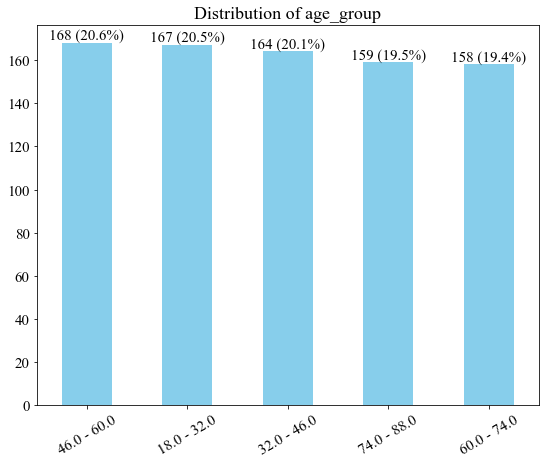

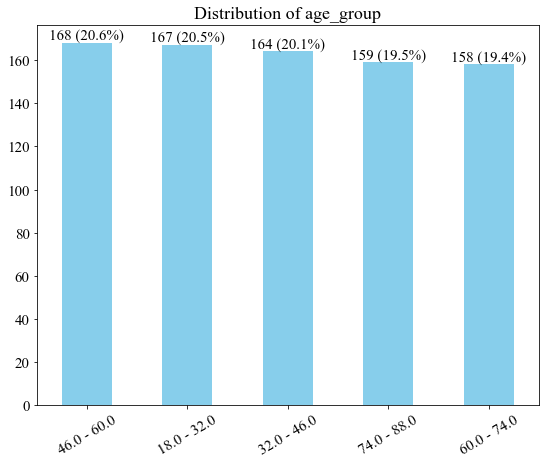

<Figure size 648x504 with 0 Axes>

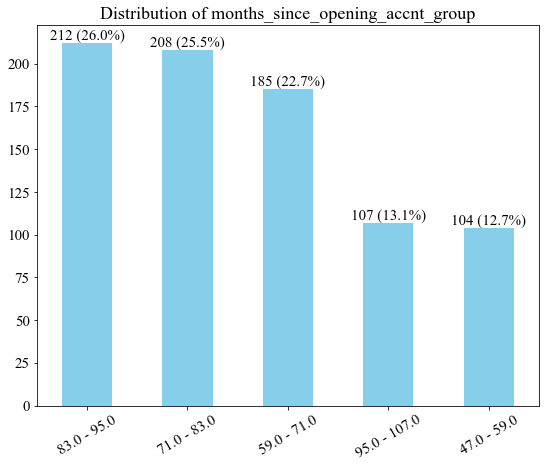

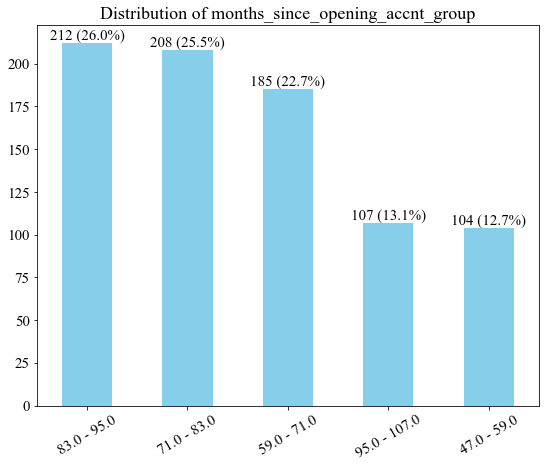

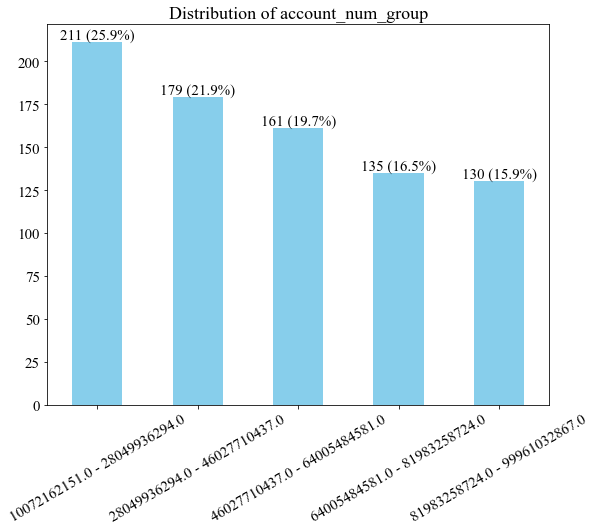

In [47]:
for feature in df_low_value_customer_information_v2.columns:
    try:plot_categorical(feature, df_low_value_customer_information_v2, rotation=30)
    except:pass 